# Checking Colab Settings

In [ ]:
# CPU
!cat /proc/cpuinfo

In [ ]:
!nvidia-smi

In [ ]:
!cat /proc/meminfo

# Accessing Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd "/content/drive/MyDrive/Cekripci/Data/"

/content/drive/MyDrive/Cekripci/Data


# Libraries
EfficientNet: Tensorflow version 2.9.3<br>
Other pre-trained: Tensorflow version 2.10.1

In [ ]:
!pip install tensorflow==2.9.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.8/511.8 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 37.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempting uninstall: tensorfl

In [ ]:
import tensorflow as tf
import os
import cv2
from PIL import Image
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, GlobalAveragePooling2D, BatchNormalization
from keras import Sequential
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from scipy.stats import norm as dist_model
from keras.utils import to_categorical

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

from matplotlib.pyplot import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from keras import layers, models
print(tf.__version__)

2.9.3


# Data

In [ ]:
train_path = "/content/drive/MyDrive/Cekripci/Data/Train/seen"

<ipython-input-6-d643d62a063f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_dict, ignore_index=True)
<ipython-input-6-d643d62a063f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_dict, ignore_index=True)
<ipython-input-6-d643d62a063f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_dict, ignore_index=True)
<ipython-input-6-d643d62a063f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_dict, ignore_index=True)
<ipython-input-6-d643d62a063f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

<Axes: xlabel='Traffic', ylabel='total'>

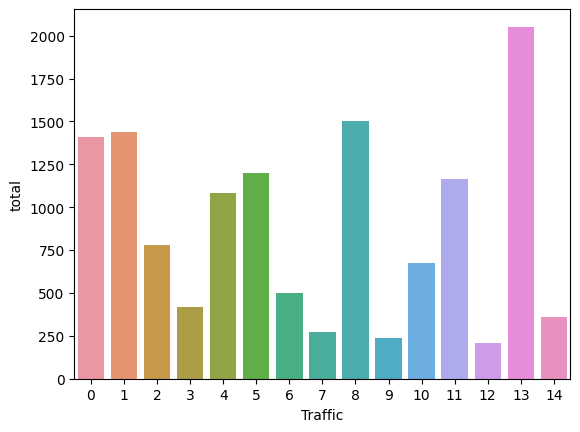

In [ ]:
# Check how many data are there
# It is supposed to be 600 per class
df = pd.DataFrame(columns=['Traffic', 'total'])

# Add an empty row to the dataframe
df.loc[len(df)] = [None]*len(df.columns)
df

for dir in os.listdir(train_path):
  new_dict = {'Traffic': dir, 'total': len(os.listdir(os.path.join(train_path, dir)))}
  df = df.append(new_dict, ignore_index=True)
df = df.drop(0)

df.head()

# Plot the data into diagram
sns.barplot(x='Traffic', y='total', data=df, orient="v")

In [ ]:
df.head(15)

,Traffic,total
1,0,1410
2,1,1440
3,2,780
4,3,420
5,4,1082
6,5,1200
7,6,497
8,7,270
9,8,1500
10,9,240


# Load & Preprocessing Data

In [ ]:
classes = { 0:'Speed limit (60km h)',
            1:'Speed limit (100km h)',
            2:'Stop',
            3:'Veh > 3.5 tons prohibited',
            4:'No entry',
            5:'General caution',
            6:'Slippery road',
            7:'Road narrows on the right',
            8:'Road work',
            9:'Pedestrians',
            10:'Turn right ahead',
            11:'Ahead only',
            12:'Go straight or left',
            13:'Keep right',
            14:'Roundabout mandatory'}

In [ ]:
keys = list(classes.keys())
values = list(classes.values())

In [ ]:
# Change this
IMG_HEIGHT = 128
IMG_WIDTH = 128

classes = 15

# Setting variables for later use
data = []

# Retrieving the images and their labels
for i in range(classes):
    path = os.path.join(train_path, str(i))
    images = os.listdir(path)

    for img in images:
      image = Image.open(path + '/'+ img)
      image = image.resize((IMG_HEIGHT, IMG_WIDTH))
      image = np.array(image)
      # train_data.append(image)
      # position = values.index(str(dir))
      # labels.append(keys[position])
      data.append([image, i])

# Converting lists into numpy arrays
# train_data = np.array(train_data)
# labels = np.array(labels)

In [ ]:
print(len(data))

13300


In [ ]:
x = []
y = []

for features, label in data:
  x.append(features)
  y.append(label)

In [ ]:
#Converting lists into numpy arrays
x = np.array(x)
y = np.array(y)

In [ ]:
print(x.shape, y.shape)
# Checking data shape

# Splitting training and testing dataset
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Converting the labels into one hot encoding
y_train_encoded = to_categorical(y_train, 15)
y_val_encoded = to_categorical(y_val, 15)

# Displaying the shape after the split
print(X_train.shape, X_val.shape, y_train_encoded.shape, y_val_encoded.shape)

(13300, 128, 128, 3) (13300,)
(10640, 128, 128, 3) (2660, 128, 128, 3) (10640, 15) (2660, 15)


# Model

## Struktur EfficientNetB1

In [ ]:
base_model = tf.keras.applications.EfficientNetB1(weights='imagenet',
                                                  include_top=True)

32148312/32148312 [==============================] - 1s 0us/step


In [ ]:
base_model.summary()

Model: "efficientnetb1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 240, 240, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 240, 240, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 240, 240, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 240, 240, 3)  0           ['normalization[0][0

## Base Model

In [ ]:
IMG_HEIGHT = 200
IMG_WIDTH = 200

In [ ]:
base_model = tf.keras.applications.EfficientNetB1(weights='imagenet',
                                               include_top=False,
                                               input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

## 32x32

### Base Model Summary (32x32)

In [ ]:
base_model.summary()

Model: "efficientnetb1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 rescaling_1 (Rescaling)        (None, 32, 32, 3)    0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 32, 32, 3)   7           ['rescaling_1[0][0]']            
 )                                                                                                
                                                                                                  
 tf.math.truediv_1 (TFOpLambda)  (None, 32, 32, 3)   0           ['normalization_1[0]

### EfficientNetB1_0007_32

In [ ]:
base_model = tf.keras.applications.EfficientNetB1(weights='imagenet',
                                                  include_top=False,
                                                  input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
EfficientNetB1_0007_32 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.4),
    Dense(15, activation='sigmoid')
])

In [ ]:
EfficientNetB1_0007_32.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb1 (Functional)  (None, 1, 1, 1280)       6575239   
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 15)                19215     
                                                                 
Total params: 6,594,454
Trainable params: 6,532,399
Non-trainable params: 62,055
_________________________________________________________________


In [ ]:
EfficientNetB1_0007_32.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.007), metrics=["accuracy"])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", verbose=1, restore_best_weights=True, patience=10)
history = EfficientNetB1_0007_32.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping],
                    validation_data=(X_val, y_val))

Epoch 1/50
333/333 [==============================] - 79s 165ms/step - loss: 1.1590 - accuracy: 0.7016 - val_loss: 2.1498 - val_accuracy: 0.8105
Epoch 2/50
333/333 [==============================] - 49s 148ms/step - loss: 0.5759 - accuracy: 0.8633 - val_loss: 6.4536 - val_accuracy: 0.7429
Epoch 3/50
333/333 [==============================] - 29s 87ms/step - loss: 0.2433 - accuracy: 0.9356 - val_loss: 0.4486 - val_accuracy: 0.8733
Epoch 4/50
333/333 [==============================] - 46s 139ms/step - loss: 0.3589 - accuracy: 0.9251 - val_loss: 0.1028 - val_accuracy: 0.9647
Epoch 5/50
333/333 [==============================] - 28s 85ms/step - loss: 0.2622 - accuracy: 0.9463 - val_loss: 1.3089 - val_accuracy: 0.8180
Epoch 6/50
333/333 [==============================] - 27s 81ms/step - loss: 0.1369 - accuracy: 0.9667 - val_loss: 0.1909 - val_accuracy: 0.9571
Epoch 7/50
333/333 [==============================] - 28s 84ms/step - loss: 0.1202 - accuracy: 0.9758 - val_loss: 0.0169 - val_accura

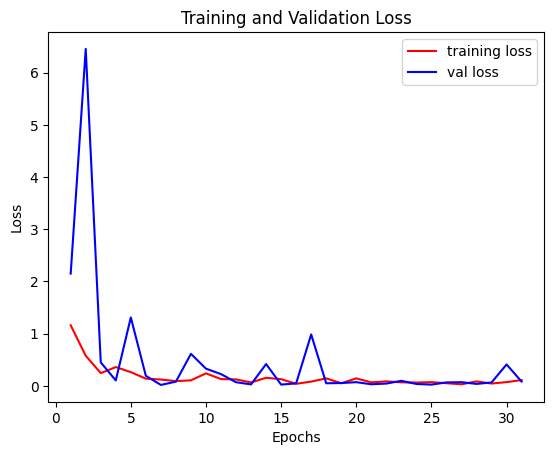

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_count = range(1, len(train_loss) + 1)

plt.plot(epoch_count, train_loss, 'r-')
plt.plot(epoch_count, val_loss, 'b-')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training and Validation Loss')
plt.legend(['training loss', 'val loss'])
plt.show()

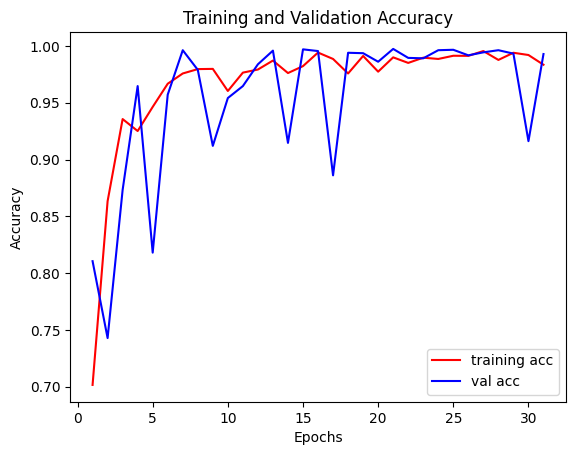

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epoch_count = range(1, len(train_acc) + 1)

plt.plot(epoch_count, train_acc, 'r-')
plt.plot(epoch_count, val_acc, 'b-')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training and Validation Accuracy')
plt.legend(['training acc', 'val acc'])
plt.show()

### EfficientNetB1_0004_32

In [ ]:
base_model = tf.keras.applications.EfficientNetB1(weights='imagenet',
                                                  include_top=False,
                                                  input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
EfficientNetB1_0004_32 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.4),
    Dense(15, activation='sigmoid')
])

In [ ]:
EfficientNetB1_0004_32.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.004), metrics=["accuracy"])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", verbose=1, restore_best_weights=True, patience=10)
history = EfficientNetB1_0004_32.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping],
                    validation_data=(X_val, y_val))

Epoch 1/50
333/333 [==============================] - 43s 87ms/step - loss: 0.8977 - accuracy: 0.7699 - val_loss: 22.7851 - val_accuracy: 0.5553
Epoch 2/50
333/333 [==============================] - 28s 84ms/step - loss: 0.2734 - accuracy: 0.9351 - val_loss: 0.0835 - val_accuracy: 0.9771
Epoch 3/50
333/333 [==============================] - 28s 85ms/step - loss: 0.3906 - accuracy: 0.9147 - val_loss: 6.4185 - val_accuracy: 0.7650
Epoch 4/50
333/333 [==============================] - 26s 77ms/step - loss: 0.2599 - accuracy: 0.9412 - val_loss: 0.1966 - val_accuracy: 0.9590
Epoch 5/50
333/333 [==============================] - 28s 83ms/step - loss: 0.1653 - accuracy: 0.9636 - val_loss: 0.0680 - val_accuracy: 0.9729
Epoch 6/50
333/333 [==============================] - 29s 88ms/step - loss: 0.0925 - accuracy: 0.9804 - val_loss: 0.0161 - val_accuracy: 0.9970
Epoch 7/50
333/333 [==============================] - 25s 76ms/step - loss: 0.0696 - accuracy: 0.9858 - val_loss: 6.4101 - val_accuracy

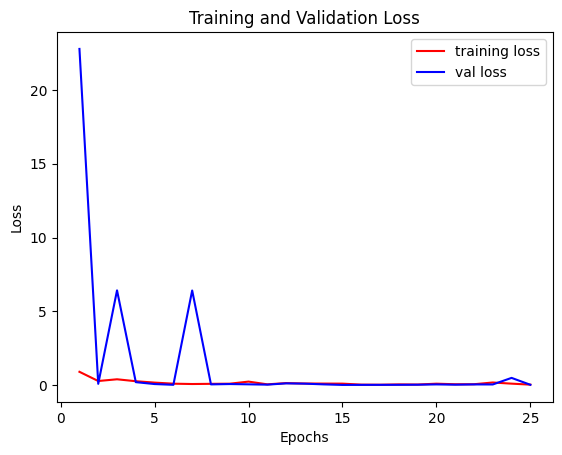

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_count = range(1, len(train_loss) + 1)

plt.plot(epoch_count, train_loss, 'r-')
plt.plot(epoch_count, val_loss, 'b-')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training and Validation Loss')
plt.legend(['training loss', 'val loss'])
plt.show()

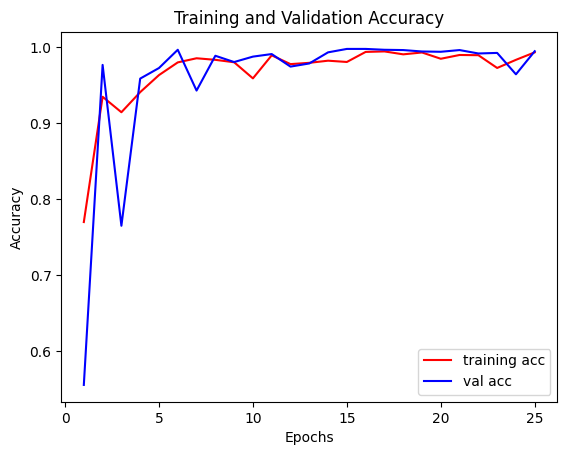

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epoch_count = range(1, len(train_acc) + 1)

plt.plot(epoch_count, train_acc, 'r-')
plt.plot(epoch_count, val_acc, 'b-')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training and Validation Accuracy')
plt.legend(['training acc', 'val acc'])
plt.show()

### EfficientNetB1_0001_32

In [ ]:
base_model = tf.keras.applications.EfficientNetB1(weights='imagenet',
                                                  include_top=False,
                                                  input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
EfficientNetB1_0001_32 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.4),
    Dense(15, activation='sigmoid')
])

In [ ]:
EfficientNetB1_0001_32.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", verbose=1, restore_best_weights=True, patience=10)
history = EfficientNetB1_0001_32.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping],
                    validation_data=(X_val, y_val))

Epoch 1/50
333/333 [==============================] - 46s 95ms/step - loss: 0.8540 - accuracy: 0.7411 - val_loss: 0.1113 - val_accuracy: 0.9654
Epoch 2/50
333/333 [==============================] - 29s 89ms/step - loss: 0.1803 - accuracy: 0.9497 - val_loss: 0.0389 - val_accuracy: 0.9914
Epoch 3/50
333/333 [==============================] - 27s 82ms/step - loss: 0.0805 - accuracy: 0.9780 - val_loss: 0.0168 - val_accuracy: 0.9974
Epoch 4/50
333/333 [==============================] - 29s 88ms/step - loss: 0.0537 - accuracy: 0.9846 - val_loss: 0.0413 - val_accuracy: 0.9906
Epoch 5/50
333/333 [==============================] - 29s 87ms/step - loss: 0.0566 - accuracy: 0.9863 - val_loss: 0.0093 - val_accuracy: 0.9970
Epoch 6/50
333/333 [==============================] - 27s 83ms/step - loss: 0.0429 - accuracy: 0.9883 - val_loss: 0.0099 - val_accuracy: 0.9989
Epoch 7/50
333/333 [==============================] - 28s 85ms/step - loss: 0.0415 - accuracy: 0.9886 - val_loss: 0.0675 - val_accuracy:

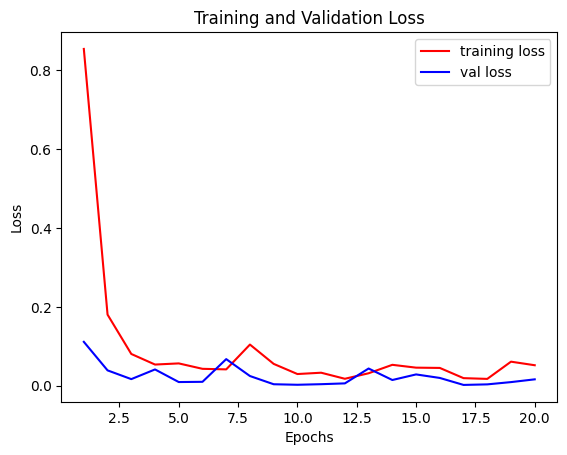

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_count = range(1, len(train_loss) + 1)

plt.plot(epoch_count, train_loss, 'r-')
plt.plot(epoch_count, val_loss, 'b-')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training and Validation Loss')
plt.legend(['training loss', 'val loss'])
plt.show()

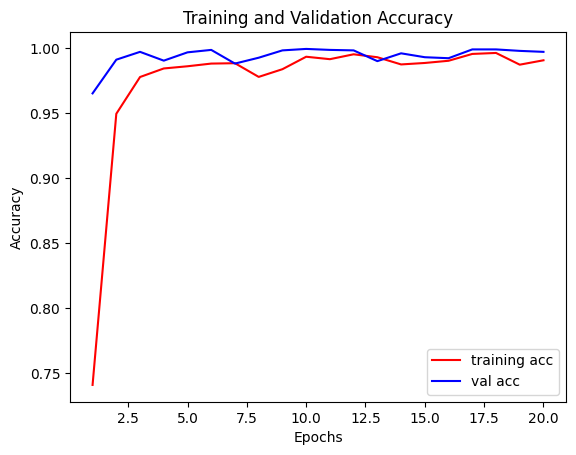

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epoch_count = range(1, len(train_acc) + 1)

plt.plot(epoch_count, train_acc, 'r-')
plt.plot(epoch_count, val_acc, 'b-')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training and Validation Accuracy')
plt.legend(['training acc', 'val acc'])
plt.show()

### EfficientNetB1_00007_32

In [ ]:
base_model = tf.keras.applications.EfficientNetB1(weights='imagenet',
                                                  include_top=False,
                                                  input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
EfficientNetB1_00007_32 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.4),
    Dense(15, activation='sigmoid')
])

In [ ]:
EfficientNetB1_00007_32.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0007), metrics=["accuracy"])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", verbose=1, restore_best_weights=True, patience=10)
history = EfficientNetB1_00007_32.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping],
                    validation_data=(X_val, y_val))

Epoch 1/50
333/333 [==============================] - 47s 96ms/step - loss: 0.9381 - accuracy: 0.7082 - val_loss: 0.1456 - val_accuracy: 0.9511
Epoch 2/50
333/333 [==============================] - 29s 86ms/step - loss: 0.1794 - accuracy: 0.9430 - val_loss: 0.0240 - val_accuracy: 0.9917
Epoch 3/50
333/333 [==============================] - 27s 81ms/step - loss: 0.0798 - accuracy: 0.9771 - val_loss: 0.0156 - val_accuracy: 0.9951
Epoch 4/50
333/333 [==============================] - 28s 85ms/step - loss: 0.0487 - accuracy: 0.9863 - val_loss: 0.0103 - val_accuracy: 0.9966
Epoch 5/50
333/333 [==============================] - 28s 85ms/step - loss: 0.0465 - accuracy: 0.9865 - val_loss: 0.0155 - val_accuracy: 0.9955
Epoch 6/50
333/333 [==============================] - 28s 83ms/step - loss: 0.0473 - accuracy: 0.9879 - val_loss: 0.0747 - val_accuracy: 0.9812
Epoch 7/50
333/333 [==============================] - 28s 84ms/step - loss: 0.0374 - accuracy: 0.9914 - val_loss: 0.0049 - val_accuracy:

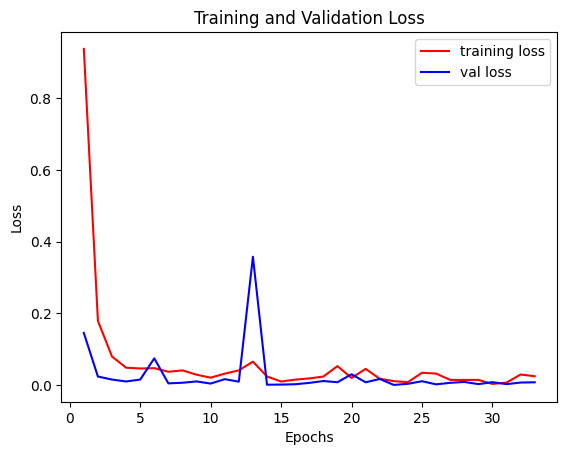

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_count = range(1, len(train_loss) + 1)

plt.plot(epoch_count, train_loss, 'r-')
plt.plot(epoch_count, val_loss, 'b-')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training and Validation Loss')
plt.legend(['training loss', 'val loss'])
plt.show()

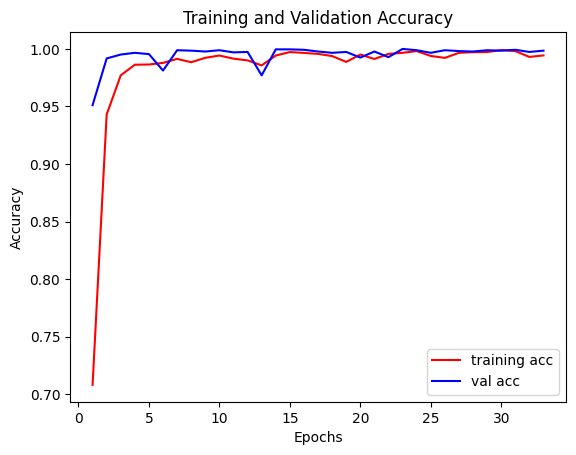

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epoch_count = range(1, len(train_acc) + 1)

plt.plot(epoch_count, train_acc, 'r-')
plt.plot(epoch_count, val_acc, 'b-')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training and Validation Accuracy')
plt.legend(['training acc', 'val acc'])
plt.show()

### EfficientNetB1_00004_32

In [ ]:
base_model = tf.keras.applications.EfficientNetB1(weights='imagenet',
                                                  include_top=False,
                                                  input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
EfficientNetB1_00004_32 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.4),
    Dense(15, activation='sigmoid')
])

In [ ]:
EfficientNetB1_00004_32.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0004), metrics=["accuracy"])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", verbose=1, restore_best_weights=True, patience=10)
history = EfficientNetB1_00004_32.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping],
                    validation_data=(X_val, y_val))

Epoch 1/50
333/333 [==============================] - 44s 93ms/step - loss: 1.2489 - accuracy: 0.6044 - val_loss: 0.2540 - val_accuracy: 0.9226
Epoch 2/50
333/333 [==============================] - 29s 86ms/step - loss: 0.2884 - accuracy: 0.9111 - val_loss: 0.0654 - val_accuracy: 0.9820
Epoch 3/50
333/333 [==============================] - 26s 79ms/step - loss: 0.1234 - accuracy: 0.9624 - val_loss: 0.0321 - val_accuracy: 0.9910
Epoch 4/50
333/333 [==============================] - 29s 86ms/step - loss: 0.0711 - accuracy: 0.9789 - val_loss: 0.0118 - val_accuracy: 0.9959
Epoch 5/50
333/333 [==============================] - 29s 87ms/step - loss: 0.0554 - accuracy: 0.9847 - val_loss: 0.0193 - val_accuracy: 0.9936
Epoch 6/50
333/333 [==============================] - 27s 81ms/step - loss: 0.0495 - accuracy: 0.9866 - val_loss: 0.0158 - val_accuracy: 0.9955
Epoch 7/50
333/333 [==============================] - 29s 86ms/step - loss: 0.0372 - accuracy: 0.9896 - val_loss: 0.0142 - val_accuracy:

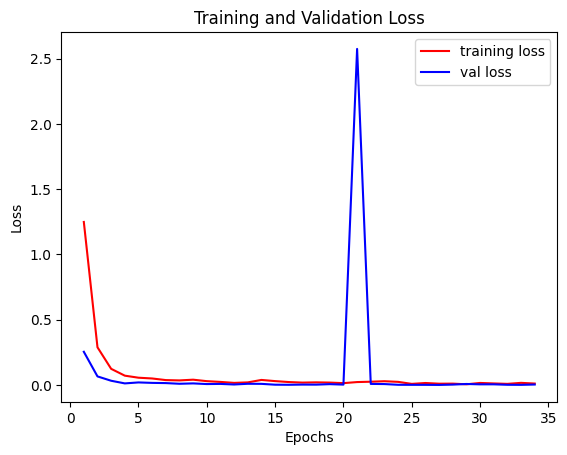

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_count = range(1, len(train_loss) + 1)

plt.plot(epoch_count, train_loss, 'r-')
plt.plot(epoch_count, val_loss, 'b-')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training and Validation Loss')
plt.legend(['training loss', 'val loss'])
plt.show()

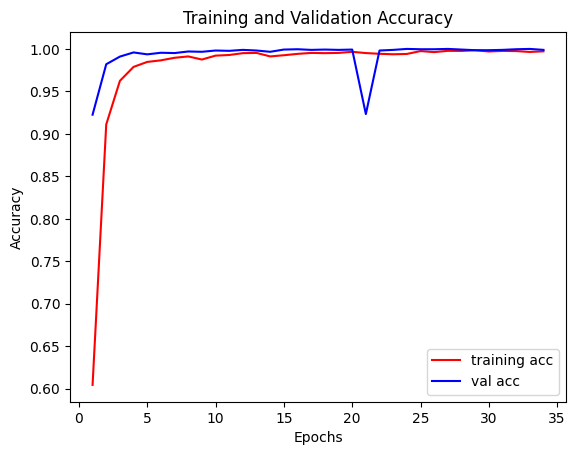

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epoch_count = range(1, len(train_acc) + 1)

plt.plot(epoch_count, train_acc, 'r-')
plt.plot(epoch_count, val_acc, 'b-')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training and Validation Accuracy')
plt.legend(['training acc', 'val acc'])
plt.show()

### EfficientNetB1_00001_32

In [ ]:
base_model = tf.keras.applications.EfficientNetB1(weights='imagenet',
                                                  include_top=False,
                                                  input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
EfficientNetB1_00001_32 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.4),
    Dense(15, activation='sigmoid')
])

In [ ]:
EfficientNetB1_00001_32.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", verbose=1, restore_best_weights=True, patience=10)
history = EfficientNetB1_00001_32.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping],
                    validation_data=(X_val, y_val))

Epoch 1/50
333/333 [==============================] - 49s 97ms/step - loss: 2.2804 - accuracy: 0.2971 - val_loss: 1.2876 - val_accuracy: 0.6338
Epoch 2/50
333/333 [==============================] - 29s 88ms/step - loss: 1.1360 - accuracy: 0.6334 - val_loss: 0.5718 - val_accuracy: 0.8203
Epoch 3/50
333/333 [==============================] - 26s 79ms/step - loss: 0.6761 - accuracy: 0.7846 - val_loss: 0.2928 - val_accuracy: 0.9124
Epoch 4/50
333/333 [==============================] - 28s 84ms/step - loss: 0.4323 - accuracy: 0.8565 - val_loss: 0.1651 - val_accuracy: 0.9575
Epoch 5/50
333/333 [==============================] - 28s 85ms/step - loss: 0.2972 - accuracy: 0.9066 - val_loss: 0.0899 - val_accuracy: 0.9722
Epoch 6/50
333/333 [==============================] - 26s 79ms/step - loss: 0.2135 - accuracy: 0.9351 - val_loss: 0.0641 - val_accuracy: 0.9838
Epoch 7/50
333/333 [==============================] - 29s 87ms/step - loss: 0.1411 - accuracy: 0.9557 - val_loss: 0.0381 - val_accuracy:

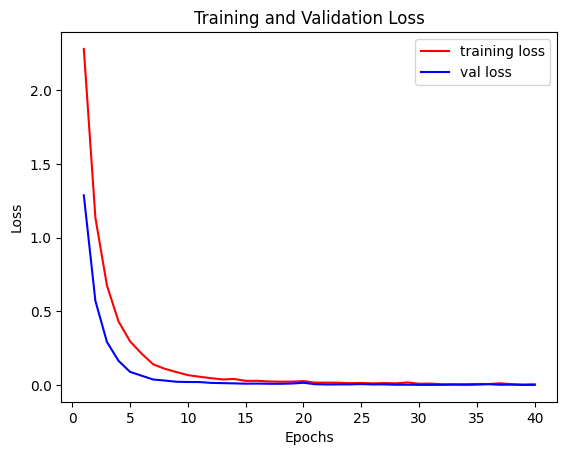

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_count = range(1, len(train_loss) + 1)

plt.plot(epoch_count, train_loss, 'r-')
plt.plot(epoch_count, val_loss, 'b-')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training and Validation Loss')
plt.legend(['training loss', 'val loss'])
plt.show()

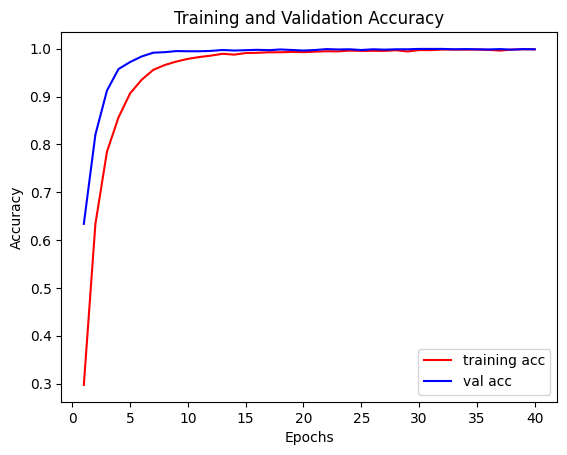

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epoch_count = range(1, len(train_acc) + 1)

plt.plot(epoch_count, train_acc, 'r-')
plt.plot(epoch_count, val_acc, 'b-')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training and Validation Accuracy')
plt.legend(['training acc', 'val acc'])
plt.show()

### EfficientNetB1_000007_32

In [ ]:
base_model = tf.keras.applications.EfficientNetB1(weights='imagenet',
                                                  include_top=False,
                                                  input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
EfficientNetB1_000007_32 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.4),
    Dense(15, activation='sigmoid')
])

In [ ]:
EfficientNetB1_000007_32.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.00007), metrics=["accuracy"])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", verbose=1, restore_best_weights=True, patience=10)
history = EfficientNetB1_000007_32.fit(X_train, y_train_encoded,
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping],
                    validation_data=(X_val, y_val_encoded))

Epoch 1/50
333/333 [==============================] - 45s 91ms/step - loss: 2.4839 - accuracy: 0.2507 - val_loss: 1.6146 - val_accuracy: 0.5199
Epoch 2/50
333/333 [==============================] - 26s 78ms/step - loss: 1.4401 - accuracy: 0.5355 - val_loss: 0.8639 - val_accuracy: 0.7357
Epoch 3/50
333/333 [==============================] - 29s 86ms/step - loss: 0.9664 - accuracy: 0.6861 - val_loss: 0.5396 - val_accuracy: 0.8380
Epoch 4/50
333/333 [==============================] - 27s 82ms/step - loss: 0.6874 - accuracy: 0.7734 - val_loss: 0.3341 - val_accuracy: 0.8996
Epoch 5/50
333/333 [==============================] - 28s 85ms/step - loss: 0.4903 - accuracy: 0.8429 - val_loss: 0.2170 - val_accuracy: 0.9361
Epoch 6/50
333/333 [==============================] - 29s 86ms/step - loss: 0.3574 - accuracy: 0.8866 - val_loss: 0.1487 - val_accuracy: 0.9564
Epoch 7/50
333/333 [==============================] - 28s 83ms/step - loss: 0.2713 - accuracy: 0.9116 - val_loss: 0.1008 - val_accuracy:

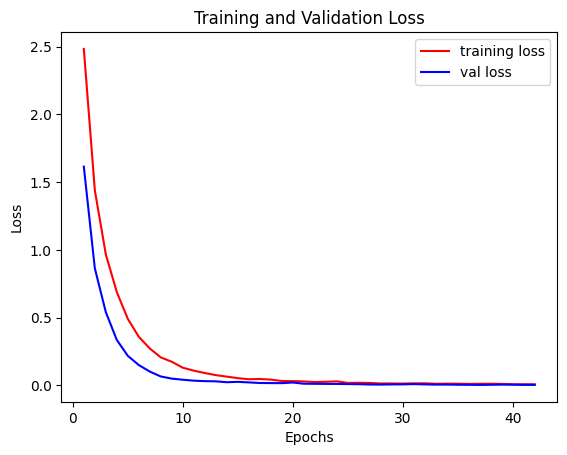

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_count = range(1, len(train_loss) + 1)

plt.plot(epoch_count, train_loss, 'r-')
plt.plot(epoch_count, val_loss, 'b-')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training and Validation Loss')
plt.legend(['training loss', 'val loss'])
plt.show()

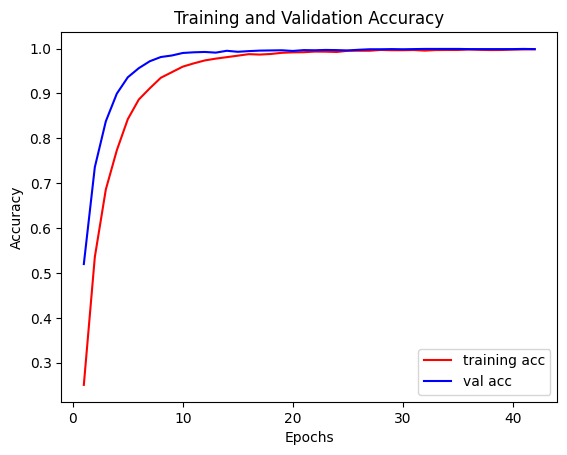

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epoch_count = range(1, len(train_acc) + 1)

plt.plot(epoch_count, train_acc, 'r-')
plt.plot(epoch_count, val_acc, 'b-')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training and Validation Accuracy')
plt.legend(['training acc', 'val acc'])
plt.show()

## 128x128

### Base Model Summary (128x128)

In [ ]:
base_model.summary()

Model: "efficientnetb1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 240, 240, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 240, 240, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 240, 240, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 240, 240, 3)  0           ['normalization[0][0

### EfficientNetB1_0007_128

In [ ]:
base_model = tf.keras.applications.EfficientNetB1(weights='imagenet',
                                               include_top=False,
                                               input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
EfficientNetB1_0007_128 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.4),
    Dense(15, activation='sigmoid') # softmax
])

27018416/27018416 [==============================] - 3s 0us/step


In [ ]:
EfficientNetB1_0007_128.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.007), metrics=["accuracy"])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", verbose=1, restore_best_weights=True, patience=10)
history = EfficientNetB1_0007_128.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping],
                    validation_data=(X_val, y_val))

Epoch 1/50
333/333 [==============================] - 83s 175ms/step - loss: 0.3993 - accuracy: 0.8898 - val_loss: 0.2754 - val_accuracy: 0.9259
Epoch 2/50
333/333 [==============================] - 53s 158ms/step - loss: 0.0887 - accuracy: 0.9767 - val_loss: 4.1114 - val_accuracy: 0.8117
Epoch 3/50
333/333 [==============================] - 53s 160ms/step - loss: 0.0530 - accuracy: 0.9861 - val_loss: 0.0154 - val_accuracy: 0.9962
Epoch 4/50
333/333 [==============================] - 53s 160ms/step - loss: 0.0173 - accuracy: 0.9961 - val_loss: 0.1074 - val_accuracy: 0.9759
Epoch 5/50
333/333 [==============================] - 54s 161ms/step - loss: 0.0833 - accuracy: 0.9785 - val_loss: 0.1056 - val_accuracy: 0.9793
Epoch 6/50
333/333 [==============================] - 53s 160ms/step - loss: 0.0346 - accuracy: 0.9900 - val_loss: 0.2158 - val_accuracy: 0.9808
Epoch 7/50
333/333 [==============================] - 53s 159ms/step - loss: 0.0383 - accuracy: 0.9916 - val_loss: 2.6706 - val_ac

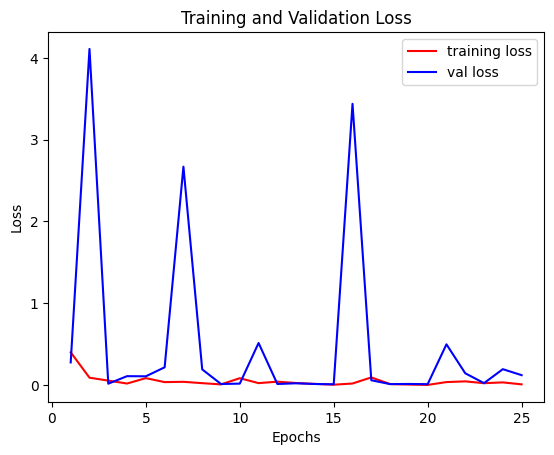

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_count = range(1, len(train_loss) + 1)

plt.plot(epoch_count, train_loss, 'r-')
plt.plot(epoch_count, val_loss, 'b-')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training and Validation Loss')
plt.legend(['training loss', 'val loss'])
plt.show()

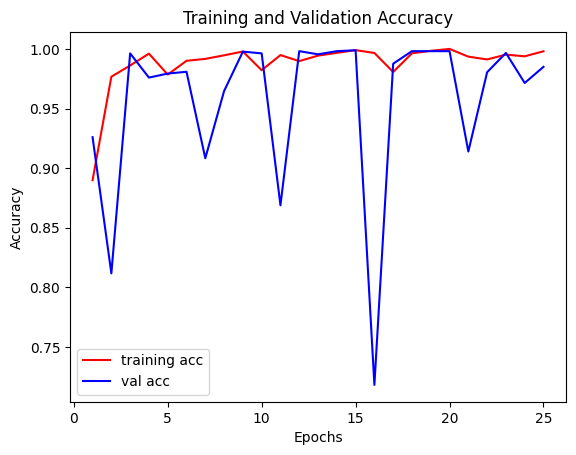

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epoch_count = range(1, len(train_acc) + 1)

plt.plot(epoch_count, train_acc, 'r-')
plt.plot(epoch_count, val_acc, 'b-')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training and Validation Accuracy')
plt.legend(['training acc', 'val acc'])
plt.show()

### EfficientNetB1_0004_128

In [ ]:
base_model = tf.keras.applications.EfficientNetB1(weights='imagenet',
                                               include_top=False,
                                               input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
EfficientNetB1_0004_128 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.4),
    Dense(15, activation='sigmoid')
])

In [ ]:
EfficientNetB1_0004_128.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.004), metrics=["accuracy"])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", verbose=1, restore_best_weights=True, patience=10)
history = EfficientNetB1_0004_128.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping],
                    validation_data=(X_val, y_val))

Epoch 1/50
333/333 [==============================] - 70s 167ms/step - loss: 0.2901 - accuracy: 0.9228 - val_loss: 3.2950 - val_accuracy: 0.8188
Epoch 2/50
333/333 [==============================] - 53s 159ms/step - loss: 0.0783 - accuracy: 0.9803 - val_loss: 11.3685 - val_accuracy: 0.3853
Epoch 3/50
333/333 [==============================] - 53s 159ms/step - loss: 0.0717 - accuracy: 0.9831 - val_loss: 0.0709 - val_accuracy: 0.9823
Epoch 4/50
333/333 [==============================] - 54s 161ms/step - loss: 0.0203 - accuracy: 0.9944 - val_loss: 0.0030 - val_accuracy: 0.9992
Epoch 5/50
333/333 [==============================] - 53s 160ms/step - loss: 0.0021 - accuracy: 0.9992 - val_loss: 0.0030 - val_accuracy: 0.9989
Epoch 6/50
333/333 [==============================] - 53s 159ms/step - loss: 0.0050 - accuracy: 0.9996 - val_loss: 0.0029 - val_accuracy: 0.9992
Epoch 7/50
333/333 [==============================] - 53s 159ms/step - loss: 0.0601 - accuracy: 0.9844 - val_loss: 0.0248 - val_a

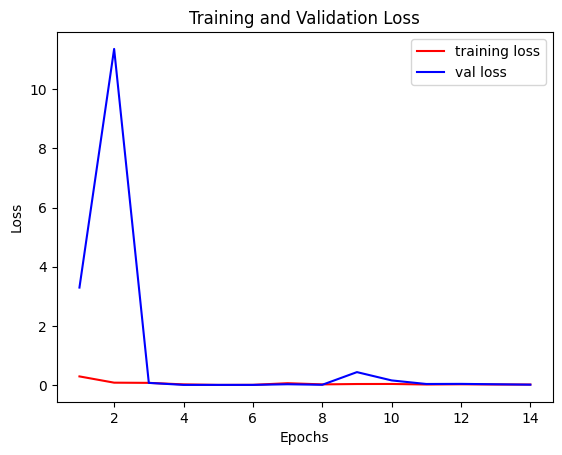

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_count = range(1, len(train_loss) + 1)

plt.plot(epoch_count, train_loss, 'r-')
plt.plot(epoch_count, val_loss, 'b-')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training and Validation Loss')
plt.legend(['training loss', 'val loss'])
plt.show()

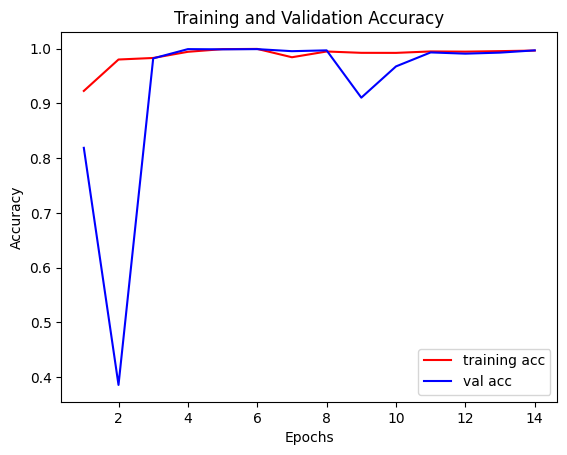

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epoch_count = range(1, len(train_acc) + 1)

plt.plot(epoch_count, train_acc, 'r-')
plt.plot(epoch_count, val_acc, 'b-')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training and Validation Accuracy')
plt.legend(['training acc', 'val acc'])
plt.show()

### EfficientNetB1_0001_128

In [ ]:
base_model = tf.keras.applications.EfficientNetB1(weights='imagenet',
                                               include_top=False,
                                               input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
EfficientNetB1_0001_128 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.4),
    Dense(15, activation='sigmoid')
])

In [ ]:
EfficientNetB1_0001_128.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", verbose=1, restore_best_weights=True, patience=10)
history = EfficientNetB1_0001_128.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping],
                    validation_data=(X_val, y_val))

Epoch 1/50
333/333 [==============================] - 69s 165ms/step - loss: 0.1597 - accuracy: 0.9562 - val_loss: 0.0240 - val_accuracy: 0.9929
Epoch 2/50
333/333 [==============================] - 52s 158ms/step - loss: 0.0269 - accuracy: 0.9937 - val_loss: 0.0958 - val_accuracy: 0.9677
Epoch 3/50
333/333 [==============================] - 53s 160ms/step - loss: 0.0234 - accuracy: 0.9939 - val_loss: 0.1958 - val_accuracy: 0.9504
Epoch 4/50
333/333 [==============================] - 53s 160ms/step - loss: 0.0378 - accuracy: 0.9930 - val_loss: 0.3456 - val_accuracy: 0.9233
Epoch 5/50
333/333 [==============================] - 53s 159ms/step - loss: 0.0201 - accuracy: 0.9940 - val_loss: 3.1000e-04 - val_accuracy: 1.0000
Epoch 6/50
333/333 [==============================] - 53s 158ms/step - loss: 0.0107 - accuracy: 0.9972 - val_loss: 3.1957e-04 - val_accuracy: 1.0000
Epoch 7/50
333/333 [==============================] - 53s 158ms/step - loss: 0.0054 - accuracy: 0.9986 - val_loss: 5.2960e

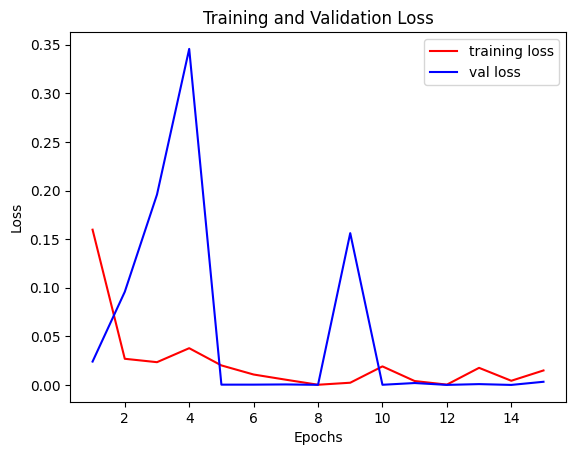

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_count = range(1, len(train_loss) + 1)

plt.plot(epoch_count, train_loss, 'r-')
plt.plot(epoch_count, val_loss, 'b-')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training and Validation Loss')
plt.legend(['training loss', 'val loss'])
plt.show()

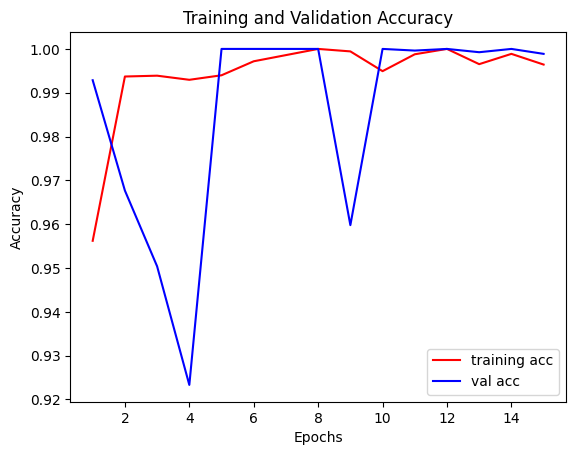

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epoch_count = range(1, len(train_acc) + 1)

plt.plot(epoch_count, train_acc, 'r-')
plt.plot(epoch_count, val_acc, 'b-')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training and Validation Accuracy')
plt.legend(['training acc', 'val acc'])
plt.show()

### EfficientNetB1_00007_128

In [ ]:
base_model = tf.keras.applications.EfficientNetB1(weights='imagenet',
                                               include_top=False,
                                               input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
EfficientNetB1_00007_128 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.4),
    Dense(15, activation='sigmoid')
])

In [ ]:
EfficientNetB1_00007_128.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0007), metrics=["accuracy"])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", verbose=1, restore_best_weights=True, patience=10)
history = EfficientNetB1_00007_128.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping],
                    validation_data=(X_val, y_val))

Epoch 1/50
333/333 [==============================] - 71s 167ms/step - loss: 0.1768 - accuracy: 0.9495 - val_loss: 0.0033 - val_accuracy: 0.9985
Epoch 2/50
333/333 [==============================] - 53s 160ms/step - loss: 0.0187 - accuracy: 0.9956 - val_loss: 0.0376 - val_accuracy: 0.9861
Epoch 3/50
333/333 [==============================] - 53s 160ms/step - loss: 0.0247 - accuracy: 0.9937 - val_loss: 0.0313 - val_accuracy: 0.9910
Epoch 4/50
333/333 [==============================] - 53s 159ms/step - loss: 0.0109 - accuracy: 0.9972 - val_loss: 1.9011e-04 - val_accuracy: 1.0000
Epoch 5/50
333/333 [==============================] - 53s 160ms/step - loss: 0.0124 - accuracy: 0.9964 - val_loss: 0.0015 - val_accuracy: 0.9996
Epoch 6/50
333/333 [==============================] - 53s 159ms/step - loss: 0.0021 - accuracy: 0.9996 - val_loss: 0.0018 - val_accuracy: 0.9992
Epoch 7/50
333/333 [==============================] - 53s 159ms/step - loss: 0.0046 - accuracy: 0.9991 - val_loss: 2.2120e-04 

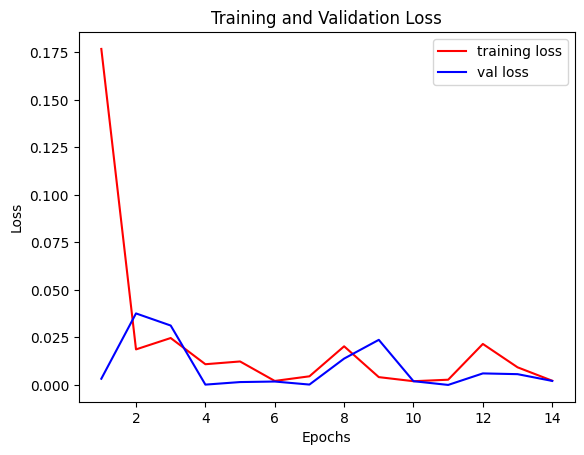

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_count = range(1, len(train_loss) + 1)

plt.plot(epoch_count, train_loss, 'r-')
plt.plot(epoch_count, val_loss, 'b-')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training and Validation Loss')
plt.legend(['training loss', 'val loss'])
plt.show()

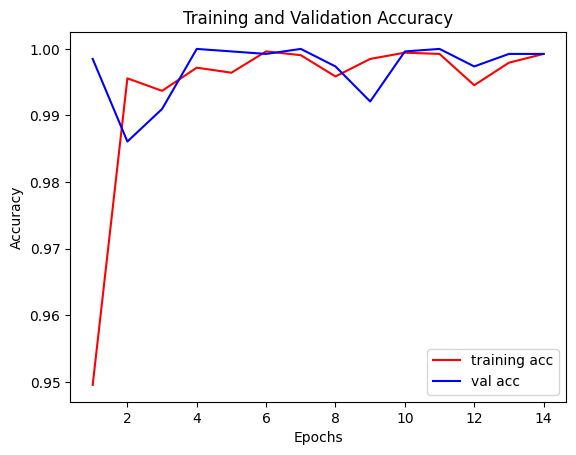

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epoch_count = range(1, len(train_acc) + 1)

plt.plot(epoch_count, train_acc, 'r-')
plt.plot(epoch_count, val_acc, 'b-')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training and Validation Accuracy')
plt.legend(['training acc', 'val acc'])
plt.show()

### EfficientNetB1_00004_128

In [ ]:
base_model = tf.keras.applications.EfficientNetB1(weights='imagenet',
                                               include_top=False,
                                               input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
EfficientNetB1_00004_128 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.4),
    Dense(15, activation='sigmoid')
])

In [ ]:
EfficientNetB1_00004_128.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0004), metrics=["accuracy"])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", verbose=1, restore_best_weights=True, patience=10)
history = EfficientNetB1_00004_128.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping],
                    validation_data=(X_val, y_val))

Epoch 1/50
333/333 [==============================] - 70s 169ms/step - loss: 0.2240 - accuracy: 0.9367 - val_loss: 0.0036 - val_accuracy: 0.9989
Epoch 2/50
333/333 [==============================] - 53s 159ms/step - loss: 0.0149 - accuracy: 0.9962 - val_loss: 0.0014 - val_accuracy: 0.9996
Epoch 3/50
333/333 [==============================] - 53s 159ms/step - loss: 0.0058 - accuracy: 0.9991 - val_loss: 3.7388e-04 - val_accuracy: 1.0000
Epoch 4/50
333/333 [==============================] - 53s 158ms/step - loss: 0.0036 - accuracy: 0.9992 - val_loss: 3.3017e-04 - val_accuracy: 1.0000
Epoch 5/50
333/333 [==============================] - 53s 158ms/step - loss: 0.0074 - accuracy: 0.9977 - val_loss: 4.4790e-04 - val_accuracy: 1.0000
Epoch 6/50
333/333 [==============================] - 53s 159ms/step - loss: 0.0115 - accuracy: 0.9974 - val_loss: 0.0046 - val_accuracy: 0.9989
Epoch 7/50
333/333 [==============================] - 53s 158ms/step - loss: 0.0069 - accuracy: 0.9982 - val_loss: 0.0

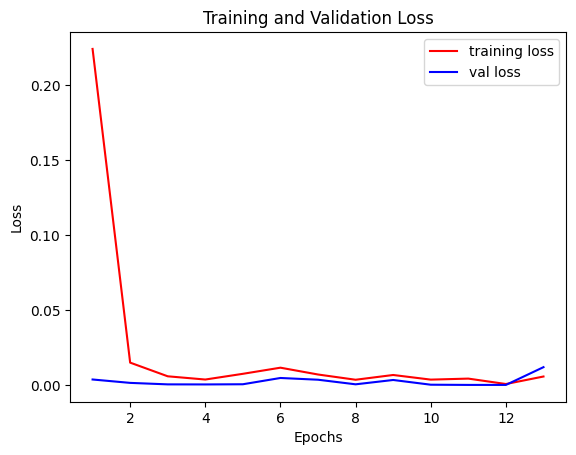

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_count = range(1, len(train_loss) + 1)

plt.plot(epoch_count, train_loss, 'r-')
plt.plot(epoch_count, val_loss, 'b-')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training and Validation Loss')
plt.legend(['training loss', 'val loss'])
plt.show()

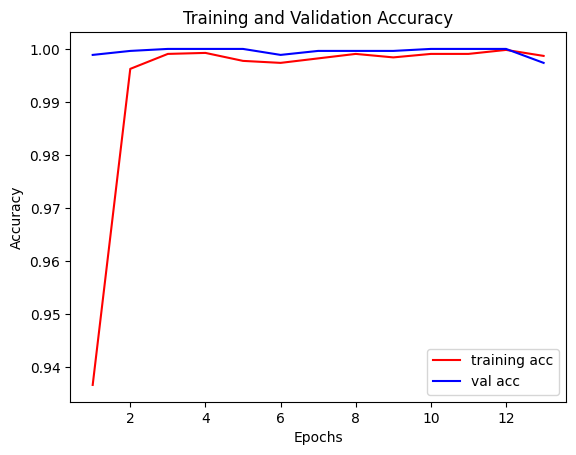

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epoch_count = range(1, len(train_acc) + 1)

plt.plot(epoch_count, train_acc, 'r-')
plt.plot(epoch_count, val_acc, 'b-')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training and Validation Accuracy')
plt.legend(['training acc', 'val acc'])
plt.show()

### EfficientNetB1_00001_128

In [ ]:
base_model = tf.keras.applications.EfficientNetB1(weights='imagenet',
                                               include_top=False,
                                               input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
EfficientNetB1_00001_128 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.4),
    Dense(15, activation='sigmoid')
])

In [ ]:
EfficientNetB1_00001_128.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", verbose=1, restore_best_weights=True, patience=10)
history = EfficientNetB1_00001_128.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping],
                    validation_data=(X_val, y_val))

Epoch 1/50
333/333 [==============================] - 69s 169ms/step - loss: 0.6491 - accuracy: 0.8235 - val_loss: 0.0314 - val_accuracy: 0.9966
Epoch 2/50
333/333 [==============================] - 52s 158ms/step - loss: 0.0437 - accuracy: 0.9911 - val_loss: 0.0051 - val_accuracy: 0.9996
Epoch 3/50
333/333 [==============================] - 52s 157ms/step - loss: 0.0154 - accuracy: 0.9972 - val_loss: 0.0028 - val_accuracy: 0.9996
Epoch 4/50
333/333 [==============================] - 53s 158ms/step - loss: 0.0107 - accuracy: 0.9979 - val_loss: 0.0028 - val_accuracy: 0.9992
Epoch 5/50
333/333 [==============================] - 53s 159ms/step - loss: 0.0073 - accuracy: 0.9986 - val_loss: 6.3763e-04 - val_accuracy: 1.0000
Epoch 6/50
333/333 [==============================] - 53s 159ms/step - loss: 0.0060 - accuracy: 0.9987 - val_loss: 0.0019 - val_accuracy: 0.9992
Epoch 7/50
333/333 [==============================] - 53s 159ms/step - loss: 0.0058 - accuracy: 0.9983 - val_loss: 0.0033 - va

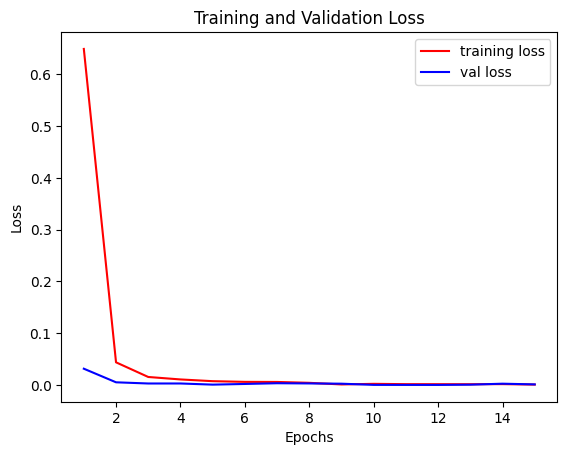

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_count = range(1, len(train_loss) + 1)

plt.plot(epoch_count, train_loss, 'r-')
plt.plot(epoch_count, val_loss, 'b-')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training and Validation Loss')
plt.legend(['training loss', 'val loss'])
plt.show()

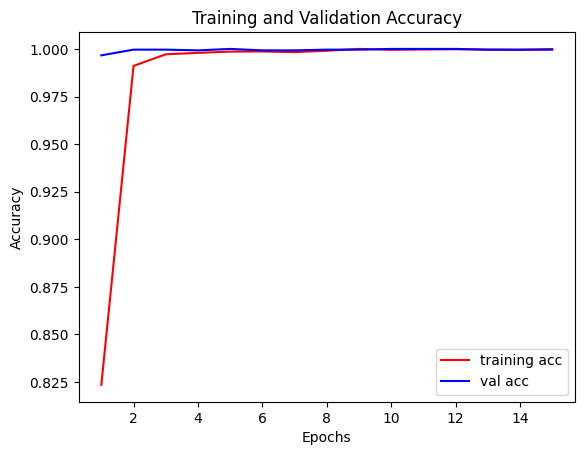

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epoch_count = range(1, len(train_acc) + 1)

plt.plot(epoch_count, train_acc, 'r-')
plt.plot(epoch_count, val_acc, 'b-')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training and Validation Accuracy')
plt.legend(['training acc', 'val acc'])
plt.show()

### EfficientNetB1_000007_128

In [ ]:
base_model = tf.keras.applications.EfficientNetB1(weights='imagenet',
                                               include_top=False,
                                               input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
EfficientNetB1_000007_128 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.4),
    Dense(15, activation='sigmoid')
])

In [ ]:
EfficientNetB1_000007_128.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.00007), metrics=["accuracy"])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", verbose=1, restore_best_weights=True, patience=10)
history = EfficientNetB1_000007_128.fit(X_train, y_train_encoded,
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping],
                    validation_data=(X_val, y_val_encoded))

Epoch 1/50
333/333 [==============================] - 70s 168ms/step - loss: 0.8488 - accuracy: 0.7695 - val_loss: 0.0728 - val_accuracy: 0.9910
Epoch 2/50
333/333 [==============================] - 53s 160ms/step - loss: 0.0790 - accuracy: 0.9851 - val_loss: 0.0136 - val_accuracy: 0.9985
Epoch 3/50
333/333 [==============================] - 53s 159ms/step - loss: 0.0319 - accuracy: 0.9914 - val_loss: 0.0049 - val_accuracy: 0.9989
Epoch 4/50
333/333 [==============================] - 52s 158ms/step - loss: 0.0158 - accuracy: 0.9961 - val_loss: 0.0032 - val_accuracy: 0.9992
Epoch 5/50
333/333 [==============================] - 52s 158ms/step - loss: 0.0107 - accuracy: 0.9977 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 6/50
333/333 [==============================] - 53s 158ms/step - loss: 0.0094 - accuracy: 0.9988 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 7/50
333/333 [==============================] - 53s 160ms/step - loss: 0.0050 - accuracy: 0.9989 - val_loss: 7.1167e-04 - va

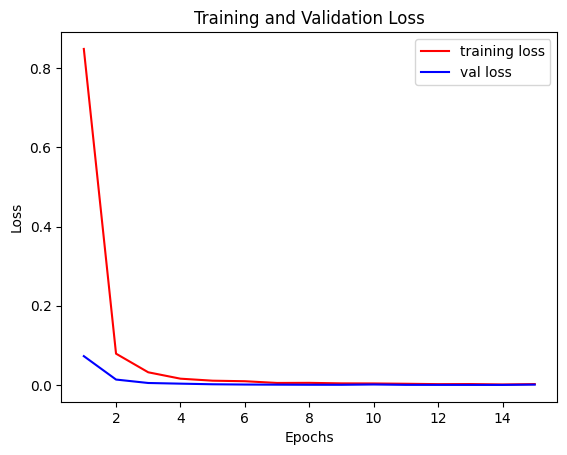

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_count = range(1, len(train_loss) + 1)

plt.plot(epoch_count, train_loss, 'r-')
plt.plot(epoch_count, val_loss, 'b-')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training and Validation Loss')
plt.legend(['training loss', 'val loss'])
plt.show()

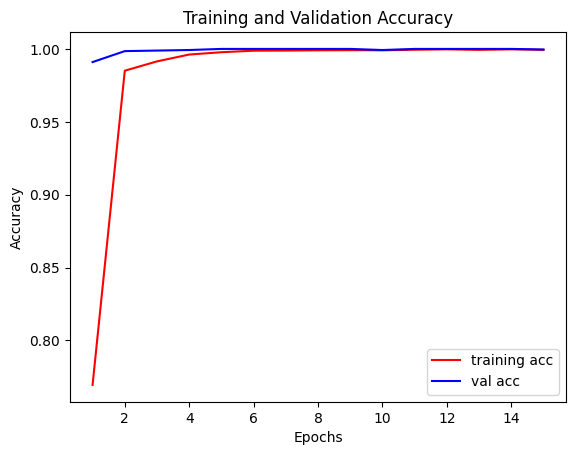

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epoch_count = range(1, len(train_acc) + 1)

plt.plot(epoch_count, train_acc, 'r-')
plt.plot(epoch_count, val_acc, 'b-')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training and Validation Accuracy')
plt.legend(['training acc', 'val acc'])
plt.show()

## 200x200

### Base Model Summary (200x200)

In [ ]:
base_model.summary()

Model: "efficientnetb1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 200, 200, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 200, 200, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 200, 200, 3)  0           ['normalization[0][0

### EfficientNetB1_0007_200

In [ ]:
IMG_HEIGHT = 200
IMG_WIDTH = 200

In [ ]:
base_model = tf.keras.applications.EfficientNetB1(weights='imagenet',
                                               include_top=False,
                                               input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
EfficientNetB1_0007_200 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.4),
    Dense(15, activation='sigmoid')
])

27018416/27018416 [==============================] - 2s 0us/step


In [ ]:
EfficientNetB1_0007_200.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb1 (Functional)  (None, 7, 7, 1280)       6575239   
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 15)                19215     
                                                                 
Total params: 6,594,454
Trainable params: 6,532,399
Non-trainable params: 62,055
_________________________________________________________________


In [ ]:
EfficientNetB1_0007_200.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.007), metrics=["accuracy"])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", verbose=1, restore_best_weights=True, patience=10)
history = EfficientNetB1_0007_200.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping],
                    validation_data=(X_val, y_val))

Epoch 1/50
333/333 [==============================] - 155s 394ms/step - loss: 0.3739 - accuracy: 0.8947 - val_loss: 6.7593 - val_accuracy: 0.4947
Epoch 2/50
333/333 [==============================] - 130s 391ms/step - loss: 0.0994 - accuracy: 0.9750 - val_loss: 0.2365 - val_accuracy: 0.9432
Epoch 3/50
333/333 [==============================] - 125s 376ms/step - loss: 0.0354 - accuracy: 0.9914 - val_loss: 0.2040 - val_accuracy: 0.9335
Epoch 4/50
333/333 [==============================] - 124s 374ms/step - loss: 0.0765 - accuracy: 0.9808 - val_loss: 0.0267 - val_accuracy: 0.9936
Epoch 5/50
333/333 [==============================] - 125s 376ms/step - loss: 0.0072 - accuracy: 0.9976 - val_loss: 8.5492e-04 - val_accuracy: 1.0000
Epoch 6/50
333/333 [==============================] - 125s 377ms/step - loss: 0.0357 - accuracy: 0.9922 - val_loss: 51.2868 - val_accuracy: 0.1301
Epoch 7/50
333/333 [==============================] - 125s 376ms/step - loss: 0.0775 - accuracy: 0.9809 - val_loss: 0.4

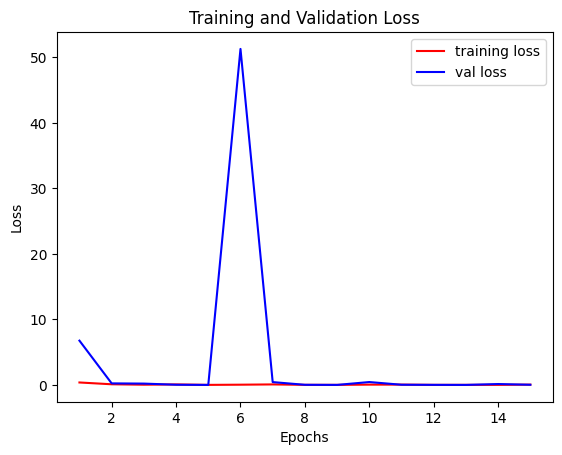

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_count = range(1, len(train_loss) + 1)

plt.plot(epoch_count, train_loss, 'r-')
plt.plot(epoch_count, val_loss, 'b-')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training and Validation Loss')
plt.legend(['training loss', 'val loss'])
plt.show()

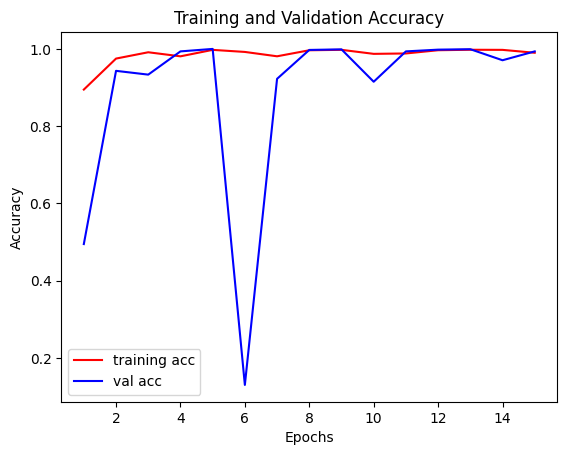

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epoch_count = range(1, len(train_acc) + 1)

plt.plot(epoch_count, train_acc, 'r-')
plt.plot(epoch_count, val_acc, 'b-')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training and Validation Accuracy')
plt.legend(['training acc', 'val acc'])
plt.show()

### EfficientNetB1_0004_200

In [ ]:
base_model = tf.keras.applications.EfficientNetB1(weights='imagenet',
                                               include_top=False,
                                               input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
EfficientNetB1_0004_200 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.4),
    Dense(15, activation='sigmoid')
])

In [ ]:
EfficientNetB1_0004_200.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.004), metrics=["accuracy"])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", verbose=1, restore_best_weights=True, patience=10)
history = EfficientNetB1_0004_200.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping],
                    validation_data=(X_val, y_val))

Epoch 1/50
333/333 [==============================] - 143s 386ms/step - loss: 0.2341 - accuracy: 0.9360 - val_loss: 1.0482 - val_accuracy: 0.7786
Epoch 2/50
333/333 [==============================] - 124s 373ms/step - loss: 0.0673 - accuracy: 0.9843 - val_loss: 0.9159 - val_accuracy: 0.8447
Epoch 3/50
333/333 [==============================] - 124s 373ms/step - loss: 0.0279 - accuracy: 0.9927 - val_loss: 0.0358 - val_accuracy: 0.9917
Epoch 4/50
333/333 [==============================] - 129s 387ms/step - loss: 0.0528 - accuracy: 0.9845 - val_loss: 1.1386 - val_accuracy: 0.8504
Epoch 5/50
333/333 [==============================] - 130s 389ms/step - loss: 0.0173 - accuracy: 0.9953 - val_loss: 0.0041 - val_accuracy: 0.9992
Epoch 6/50
333/333 [==============================] - 124s 372ms/step - loss: 0.0589 - accuracy: 0.9854 - val_loss: 5.8179 - val_accuracy: 0.6222
Epoch 7/50
333/333 [==============================] - 124s 373ms/step - loss: 0.0051 - accuracy: 0.9983 - val_loss: 0.0012 -

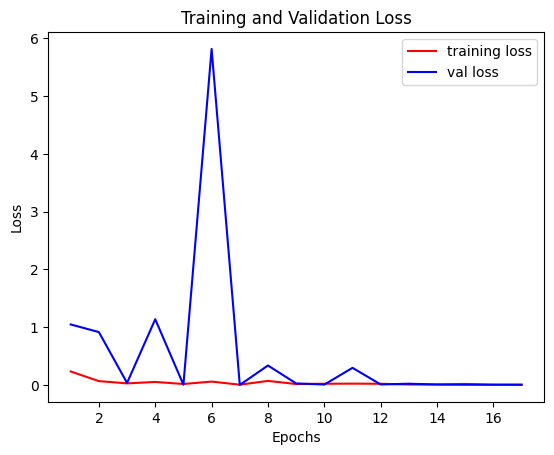

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_count = range(1, len(train_loss) + 1)

plt.plot(epoch_count, train_loss, 'r-')
plt.plot(epoch_count, val_loss, 'b-')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training and Validation Loss')
plt.legend(['training loss', 'val loss'])
plt.show()

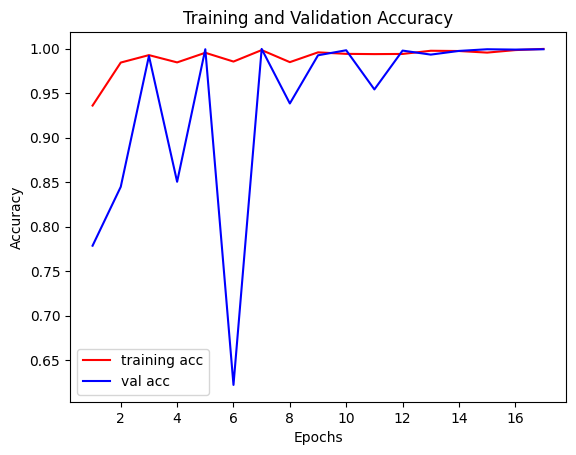

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epoch_count = range(1, len(train_acc) + 1)

plt.plot(epoch_count, train_acc, 'r-')
plt.plot(epoch_count, val_acc, 'b-')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training and Validation Accuracy')
plt.legend(['training acc', 'val acc'])
plt.show()

### EfficientNetB1_0001_200

In [ ]:
base_model = tf.keras.applications.EfficientNetB1(weights='imagenet',
                                               include_top=False,
                                               input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
EfficientNetB1_0001_200 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.4),
    Dense(15, activation='sigmoid')
])

In [ ]:
EfficientNetB1_0001_200.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", verbose=1, restore_best_weights=True, patience=10)
history = EfficientNetB1_0001_200.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping],
                    validation_data=(X_val, y_val))

Epoch 1/50
333/333 [==============================] - 143s 382ms/step - loss: 0.1262 - accuracy: 0.9634 - val_loss: 0.0282 - val_accuracy: 0.9925
Epoch 2/50
333/333 [==============================] - 124s 373ms/step - loss: 0.0192 - accuracy: 0.9948 - val_loss: 0.0053 - val_accuracy: 0.9989
Epoch 3/50
333/333 [==============================] - 124s 374ms/step - loss: 0.0234 - accuracy: 0.9940 - val_loss: 0.0140 - val_accuracy: 0.9985
Epoch 4/50
333/333 [==============================] - 124s 373ms/step - loss: 0.0145 - accuracy: 0.9961 - val_loss: 0.0252 - val_accuracy: 0.9940
Epoch 5/50
333/333 [==============================] - 124s 373ms/step - loss: 0.0310 - accuracy: 0.9938 - val_loss: 0.0093 - val_accuracy: 0.9977
Epoch 6/50
333/333 [==============================] - 128s 386ms/step - loss: 0.0054 - accuracy: 0.9986 - val_loss: 2.9976e-04 - val_accuracy: 1.0000
Epoch 7/50
333/333 [==============================] - 130s 389ms/step - loss: 0.0269 - accuracy: 0.9931 - val_loss: 0.43

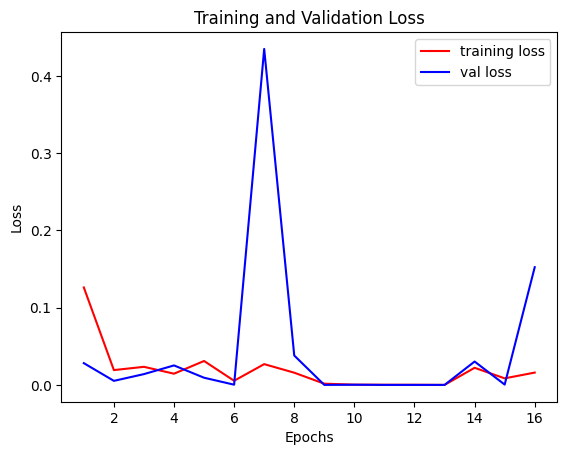

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_count = range(1, len(train_loss) + 1)

plt.plot(epoch_count, train_loss, 'r-')
plt.plot(epoch_count, val_loss, 'b-')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training and Validation Loss')
plt.legend(['training loss', 'val loss'])
plt.show()

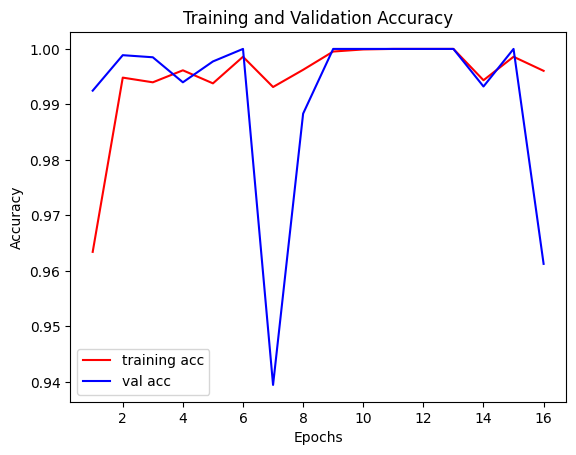

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epoch_count = range(1, len(train_acc) + 1)

plt.plot(epoch_count, train_acc, 'r-')
plt.plot(epoch_count, val_acc, 'b-')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training and Validation Accuracy')
plt.legend(['training acc', 'val acc'])
plt.show()

### EfficientNetB1_00007_240

In [ ]:
base_model = tf.keras.applications.EfficientNetB1(weights='imagenet',
                                               include_top=False,
                                               input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
EfficientNetB1_00007_200 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.4),
    Dense(15, activation='sigmoid')
])

27018416/27018416 [==============================] - 1s 0us/step


In [ ]:
EfficientNetB1_00007_200.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0007), metrics=["accuracy"])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", verbose=1, restore_best_weights=True, patience=10)
history = EfficientNetB1_00007_200.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping],
                    validation_data=(X_val, y_val))

Epoch 1/50
333/333 [==============================] - 152s 385ms/step - loss: 0.1384 - accuracy: 0.9615 - val_loss: 0.0070 - val_accuracy: 0.9985
Epoch 2/50
333/333 [==============================] - 126s 377ms/step - loss: 0.0050 - accuracy: 0.9988 - val_loss: 3.8255e-04 - val_accuracy: 1.0000
Epoch 3/50
333/333 [==============================] - 126s 377ms/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.1494 - val_accuracy: 0.9654
Epoch 4/50
333/333 [==============================] - 125s 375ms/step - loss: 0.0261 - accuracy: 0.9936 - val_loss: 6.2408e-04 - val_accuracy: 0.9996
Epoch 5/50
333/333 [==============================] - 125s 374ms/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 2.4011e-04 - val_accuracy: 1.0000
Epoch 6/50
333/333 [==============================] - 130s 391ms/step - loss: 0.0022 - accuracy: 0.9992 - val_loss: 5.8167e-04 - val_accuracy: 1.0000
Epoch 7/50
333/333 [==============================] - 130s 389ms/step - loss: 0.0262 - accuracy: 0.9945 - va

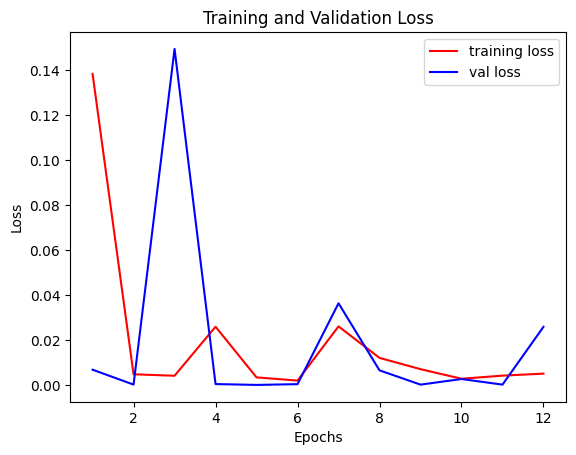

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_count = range(1, len(train_loss) + 1)

plt.plot(epoch_count, train_loss, 'r-')
plt.plot(epoch_count, val_loss, 'b-')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training and Validation Loss')
plt.legend(['training loss', 'val loss'])
plt.show()

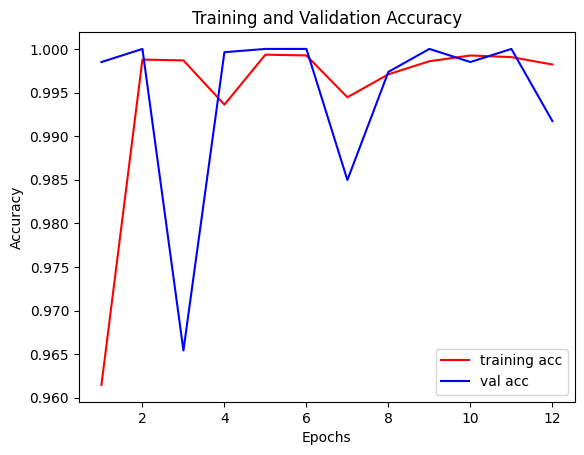

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epoch_count = range(1, len(train_acc) + 1)

plt.plot(epoch_count, train_acc, 'r-')
plt.plot(epoch_count, val_acc, 'b-')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training and Validation Accuracy')
plt.legend(['training acc', 'val acc'])
plt.show()

### EfficientNetB1_00004_240

In [ ]:
base_model = tf.keras.applications.EfficientNetB1(weights='imagenet',
                                               include_top=False,
                                               input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
EfficientNetB1_00004_200 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.4),
    Dense(15, activation='sigmoid')
])

In [ ]:
EfficientNetB1_00004_200.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0004), metrics=["accuracy"])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", verbose=1, restore_best_weights=True, patience=10)
history = EfficientNetB1_00004_200.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping],
                    validation_data=(X_val, y_val))

Epoch 1/50
333/333 [==============================] - 147s 389ms/step - loss: 0.1596 - accuracy: 0.9575 - val_loss: 6.4252e-04 - val_accuracy: 1.0000
Epoch 2/50
333/333 [==============================] - 130s 391ms/step - loss: 0.0125 - accuracy: 0.9969 - val_loss: 7.0590e-04 - val_accuracy: 1.0000
Epoch 3/50
333/333 [==============================] - 126s 378ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.0065 - val_accuracy: 0.9985
Epoch 4/50
333/333 [==============================] - 131s 392ms/step - loss: 0.0054 - accuracy: 0.9988 - val_loss: 5.7528e-04 - val_accuracy: 0.9996
Epoch 5/50
333/333 [==============================] - 126s 378ms/step - loss: 0.0092 - accuracy: 0.9975 - val_loss: 0.0054 - val_accuracy: 0.9977
Epoch 6/50
333/333 [==============================] - 126s 378ms/step - loss: 0.0065 - accuracy: 0.9982 - val_loss: 0.0024 - val_accuracy: 0.9992
Epoch 7/50
333/333 [==============================] - 130s 392ms/step - loss: 0.0050 - accuracy: 0.9988 - val_lo

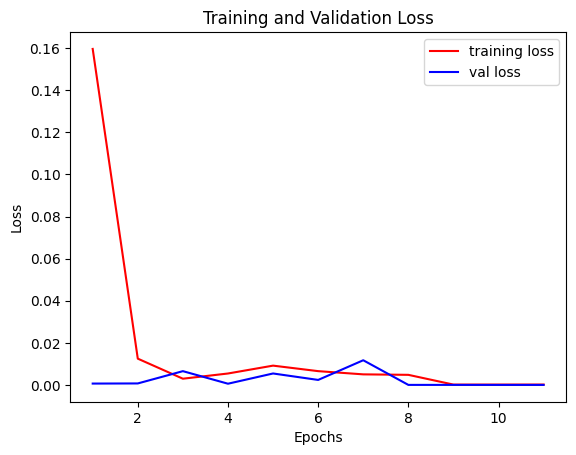

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_count = range(1, len(train_loss) + 1)

plt.plot(epoch_count, train_loss, 'r-')
plt.plot(epoch_count, val_loss, 'b-')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training and Validation Loss')
plt.legend(['training loss', 'val loss'])
plt.show()

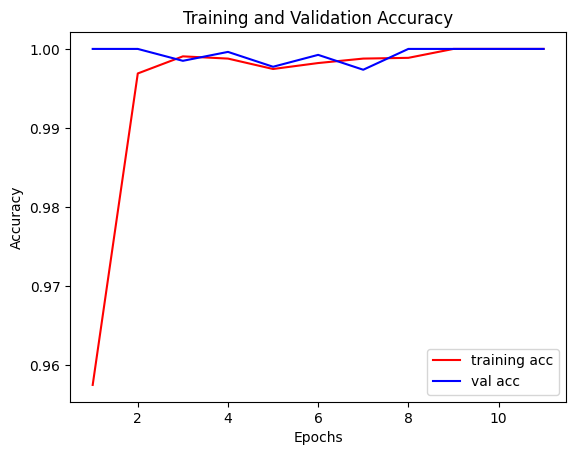

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epoch_count = range(1, len(train_acc) + 1)

plt.plot(epoch_count, train_acc, 'r-')
plt.plot(epoch_count, val_acc, 'b-')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training and Validation Accuracy')
plt.legend(['training acc', 'val acc'])
plt.show()

### EfficientNetB1_00001_240

In [ ]:
base_model = tf.keras.applications.EfficientNetB1(weights='imagenet',
                                               include_top=False,
                                               input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
EfficientNetB1_00001_200 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.4),
    Dense(15, activation='sigmoid')
])

In [ ]:
EfficientNetB1_00001_200.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", verbose=1, restore_best_weights=True, patience=10)
history = EfficientNetB1_00001_200.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping],
                    validation_data=(X_val, y_val))

Epoch 1/50
333/333 [==============================] - 148s 404ms/step - loss: 0.4906 - accuracy: 0.8721 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 2/50
333/333 [==============================] - 126s 378ms/step - loss: 0.0201 - accuracy: 0.9969 - val_loss: 0.0029 - val_accuracy: 0.9992
Epoch 3/50
333/333 [==============================] - 126s 379ms/step - loss: 0.0069 - accuracy: 0.9992 - val_loss: 3.8973e-04 - val_accuracy: 1.0000
Epoch 4/50
333/333 [==============================] - 131s 392ms/step - loss: 0.0051 - accuracy: 0.9990 - val_loss: 2.9446e-04 - val_accuracy: 1.0000
Epoch 5/50
333/333 [==============================] - 130s 391ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 2.6156e-04 - val_accuracy: 1.0000
Epoch 6/50
333/333 [==============================] - 130s 390ms/step - loss: 0.0035 - accuracy: 0.9991 - val_loss: 1.1705e-04 - val_accuracy: 1.0000
Epoch 7/50
333/333 [==============================] - 130s 391ms/step - loss: 0.0022 - accuracy: 0.9995 - va

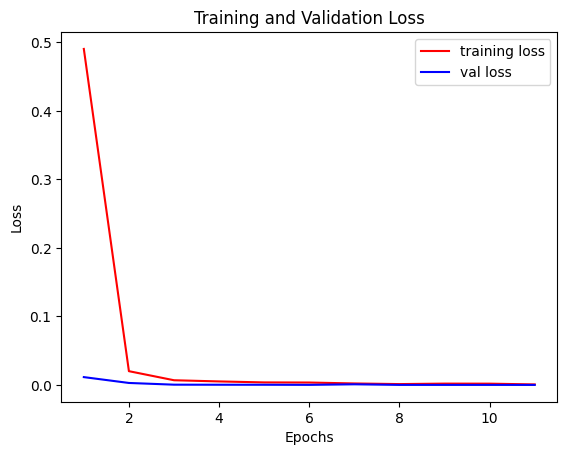

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_count = range(1, len(train_loss) + 1)

plt.plot(epoch_count, train_loss, 'r-')
plt.plot(epoch_count, val_loss, 'b-')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training and Validation Loss')
plt.legend(['training loss', 'val loss'])
plt.show()

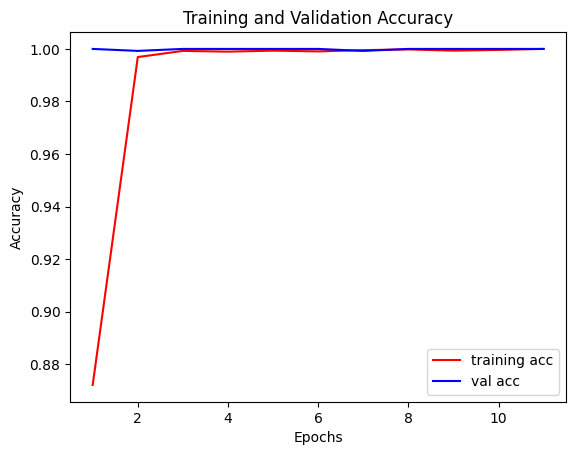

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epoch_count = range(1, len(train_acc) + 1)

plt.plot(epoch_count, train_acc, 'r-')
plt.plot(epoch_count, val_acc, 'b-')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training and Validation Accuracy')
plt.legend(['training acc', 'val acc'])
plt.show()

### EfficientNetB1_000007_240

In [ ]:
base_model = tf.keras.applications.EfficientNetB1(weights='imagenet',
                                               include_top=False,
                                               input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
EfficientNetB1_000007_200 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.4),
    Dense(15, activation='sigmoid')
])

In [ ]:
EfficientNetB1_000007_200.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.00007), metrics=["accuracy"])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", verbose=1, restore_best_weights=True, patience=10)
history = EfficientNetB1_000007_200.fit(X_train, y_train_encoded,
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping],
                    validation_data=(X_val, y_val_encoded))

Epoch 1/50
333/333 [==============================] - 140s 376ms/step - loss: 0.6641 - accuracy: 0.8276 - val_loss: 0.0306 - val_accuracy: 0.9962
Epoch 2/50
333/333 [==============================] - 129s 388ms/step - loss: 0.0375 - accuracy: 0.9937 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 3/50
333/333 [==============================] - 125s 374ms/step - loss: 0.0175 - accuracy: 0.9966 - val_loss: 0.0022 - val_accuracy: 0.9996
Epoch 4/50
333/333 [==============================] - 126s 377ms/step - loss: 0.0090 - accuracy: 0.9988 - val_loss: 7.1092e-04 - val_accuracy: 1.0000
Epoch 5/50
333/333 [==============================] - 126s 377ms/step - loss: 0.0045 - accuracy: 0.9993 - val_loss: 4.1318e-04 - val_accuracy: 1.0000
Epoch 6/50
333/333 [==============================] - 126s 378ms/step - loss: 0.0032 - accuracy: 0.9996 - val_loss: 1.7402e-04 - val_accuracy: 1.0000
Epoch 7/50
333/333 [==============================] - 131s 392ms/step - loss: 0.0035 - accuracy: 0.9995 - val_lo

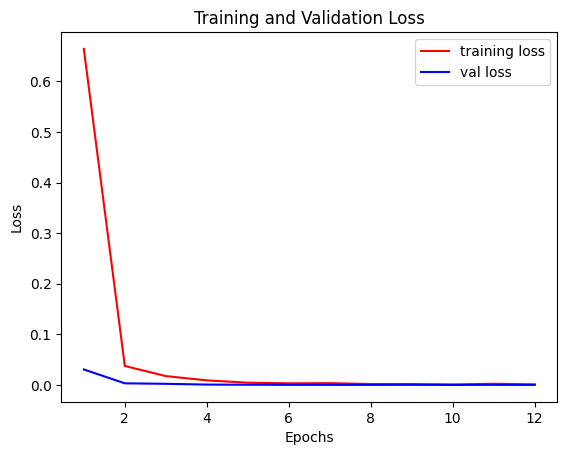

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_count = range(1, len(train_loss) + 1)

plt.plot(epoch_count, train_loss, 'r-')
plt.plot(epoch_count, val_loss, 'b-')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training and Validation Loss')
plt.legend(['training loss', 'val loss'])
plt.show()

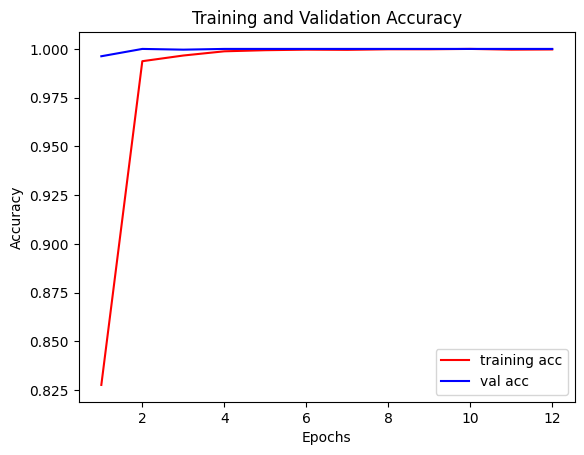

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epoch_count = range(1, len(train_acc) + 1)

plt.plot(epoch_count, train_acc, 'r-')
plt.plot(epoch_count, val_acc, 'b-')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training and Validation Accuracy')
plt.legend(['training acc', 'val acc'])
plt.show()

# Save Model

In [ ]:
%pwd

'/content/drive/.shortcut-targets-by-id/1SUnk0qe_oUfpJR0fm3bHC__BEbJdR6FT/Cekripci/Data'

In [ ]:
%cd ..
%cd 'Saved Model'
# change command below

/content/drive/.shortcut-targets-by-id/1SUnk0qe_oUfpJR0fm3bHC__BEbJdR6FT/Cekripci
/content/drive/.shortcut-targets-by-id/1SUnk0qe_oUfpJR0fm3bHC__BEbJdR6FT/Cekripci/Saved Model


## 32x32

In [ ]:
EfficientNetB1_0007_32.save('EfficientNetB1_0007_32.h5')

In [ ]:
EfficientNetB1_0004_32.save('EfficientNetB1_0004_32.h5')

In [ ]:
EfficientNetB1_0001_32.save('EfficientNetB1_0001_32.h5')

In [ ]:
EfficientNetB1_00007_32.save('EfficientNetB1_00007_32.h5')

In [ ]:
EfficientNetB1_00004_32.save('EfficientNetB1_00004_32.h5')

In [ ]:
EfficientNetB1_00001_32.save('EfficientNetB1_00001_32.h5')

In [ ]:
EfficientNetB1_000007_32.save('EfficientNetB1_000007_32.h5')

## 128x128

In [ ]:
EfficientNetB1_0007_128.save('EfficientNetB1_0007_128.h5')

In [ ]:
EfficientNetB1_0004_128.save('EfficientNetB1_0004_128.h5')

In [ ]:
EfficientNetB1_0001_128.save('EfficientNetB1_0001_128.h5')

In [ ]:
EfficientNetB1_00007_128.save('EfficientNetB1_00007_128.h5')

In [ ]:
EfficientNetB1_00004_128.save('EfficientNetB1_00004_128.h5')

In [ ]:
EfficientNetB1_00001_128.save('EfficientNetB1_00001_128.h5')

In [ ]:
EfficientNetB1_000007_128.save('EfficientNetB1_000007_128.h5')

## 200x200

In [ ]:
EfficientNetB1_0007_200.save('EfficientNetB1_0007_200.h5')

In [ ]:
EfficientNetB1_0004_200.save('EfficientNetB1_0004_200.h5')

In [ ]:
EfficientNetB1_0001_200.save('EfficientNetB1_0001_200.h5')

In [ ]:
EfficientNetB1_00007_200.save('EfficientNetB1_00007_200.h5')

In [ ]:
EfficientNetB1_00004_200.save('EfficientNetB1_00004_200.h5')

In [ ]:
EfficientNetB1_00001_200.save('EfficientNetB1_00001_200.h5')

In [ ]:
EfficientNetB1_000007_200.save('EfficientNetB1_000007_200.h5')

# Let's Predict and Evaluate!

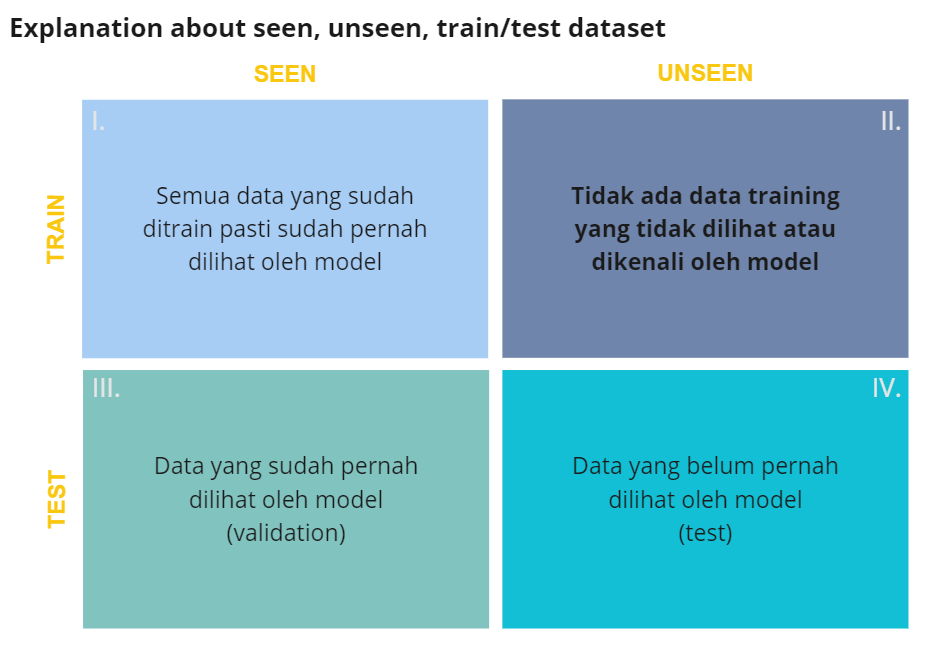

## Seen Test

In [ ]:
test_label = np.load('/content/drive/MyDrive/Cekripci/Data/Test/Seen/label_seen_test.npy')

### 32x32

In [ ]:
test_data = np.load('/content/drive/MyDrive/Cekripci/Data/Test/Seen/seen_test_32x32.npy')
EfficientNetB1_00007_32 = tf.keras.models.load_model('/content/drive/My Drive/Cekripci/Saved Model/EfficientNetB1_00007_32.h5')

In [ ]:
test_data.shape

(4290, 32, 32, 3)

In [ ]:
label_pred = EfficientNetB1_00007_32.predict(test_data)

135/135 [==============================] - 12s 21ms/step


In [ ]:
new_label_pred = []
for i in label_pred:
  max_class = np.argmax(i)
  new_label_pred.append(max_class)

new_label_pred = np.array(new_label_pred)

In [ ]:
new_label = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

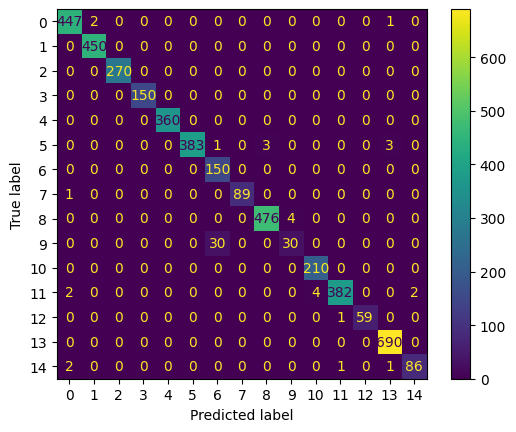

In [ ]:
cm = confusion_matrix(test_label, new_label_pred, labels=new_label)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=new_label)
cm_disp.plot()
plt.show()

In [ ]:
str_label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']
print(classification_report(test_label, new_label_pred, target_names=None, digits=3))

              precision    recall  f1-score   support

           0      0.989     0.993     0.991       450
           1      0.996     1.000     0.998       450
           2      1.000     1.000     1.000       270
           3      1.000     1.000     1.000       150
           4      1.000     1.000     1.000       360
           5      1.000     0.982     0.991       390
           6      0.829     1.000     0.906       150
           7      1.000     0.989     0.994        90
           8      0.994     0.992     0.993       480
           9      0.882     0.500     0.638        60
          10      0.981     1.000     0.991       210
          11      0.995     0.979     0.987       390
          12      1.000     0.983     0.992        60
          13      0.993     1.000     0.996       690
          14      0.977     0.956     0.966        90

    accuracy                          0.986      4290
   macro avg      0.976     0.958     0.963      4290
weighted avg      0.987   

### 128x128

In [ ]:
test_data = np.load('/content/drive/MyDrive/Cekripci/Data/Test/Seen/seen_test_128x128.npy')
EfficientNetB1_00004_128 = tf.keras.models.load_model('/content/drive/My Drive/Cekripci/Saved Model/EfficientNetB1_00004_128.h5')

In [ ]:
test_data.shape

(4290, 128, 128, 3)

In [ ]:
label_pred = EfficientNetB1_00004_128.predict(test_data)

135/135 [==============================] - 6s 29ms/step


In [ ]:
new_label_pred = []
for i in label_pred:
  max_class = np.argmax(i)
  new_label_pred.append(max_class)

new_label_pred = np.array(new_label_pred)

In [ ]:
new_label = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

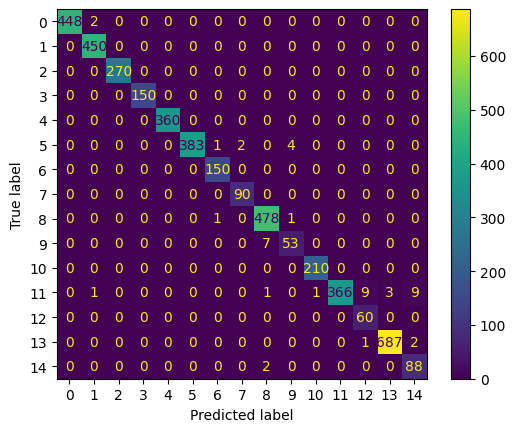

In [ ]:
cm = confusion_matrix(test_label, new_label_pred, labels=new_label)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=new_label)
cm_disp.plot()
plt.show()

In [ ]:
str_label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']
print(classification_report(test_label, new_label_pred, target_names=None, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.996     0.998       450
           1      0.993     1.000     0.997       450
           2      1.000     1.000     1.000       270
           3      1.000     1.000     1.000       150
           4      1.000     1.000     1.000       360
           5      1.000     0.982     0.991       390
           6      0.987     1.000     0.993       150
           7      0.978     1.000     0.989        90
           8      0.980     0.996     0.988       480
           9      0.914     0.883     0.898        60
          10      0.995     1.000     0.998       210
          11      1.000     0.938     0.968       390
          12      0.857     1.000     0.923        60
          13      0.996     0.996     0.996       690
          14      0.889     0.978     0.931        90

    accuracy                          0.989      4290
   macro avg      0.973     0.985     0.978      4290
weighted avg      0.990   

### 200x200

In [ ]:
test_data = np.load('/content/drive/MyDrive/Cekripci/Data/Test/Seen/seen_test_200x200.npy')
EfficientNetB1_00007_200 = tf.keras.models.load_model('/content/drive/My Drive/Cekripci/Saved Model/EfficientNetB1_00007_200.h5')

In [ ]:
test_data.shape

(4290, 200, 200, 3)

In [ ]:
label_pred = EfficientNetB1_00007_200.predict(test_data)

135/135 [==============================] - 12s 67ms/step


In [ ]:
new_label_pred = []
for i in label_pred:
  max_class = np.argmax(i)
  new_label_pred.append(max_class)

new_label_pred = np.array(new_label_pred)

In [ ]:
new_label = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

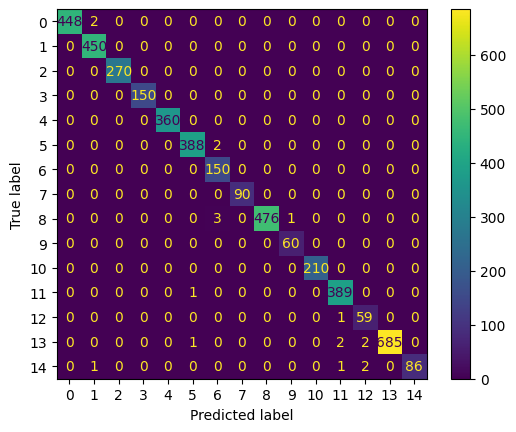

In [ ]:
cm = confusion_matrix(test_label, new_label_pred, labels=new_label)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=new_label)
cm_disp.plot()
plt.show()

In [ ]:
str_label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']
print(classification_report(test_label, new_label_pred, target_names=None, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.996     0.998       450
           1      0.993     1.000     0.997       450
           2      1.000     1.000     1.000       270
           3      1.000     1.000     1.000       150
           4      1.000     1.000     1.000       360
           5      0.995     0.995     0.995       390
           6      0.968     1.000     0.984       150
           7      1.000     1.000     1.000        90
           8      1.000     0.992     0.996       480
           9      0.984     1.000     0.992        60
          10      1.000     1.000     1.000       210
          11      0.990     0.997     0.994       390
          12      0.937     0.983     0.959        60
          13      1.000     0.993     0.996       690
          14      1.000     0.956     0.977        90

    accuracy                          0.996      4290
   macro avg      0.991     0.994     0.992      4290
weighted avg      0.996   

## Unseen Test I

In [ ]:
test_label = np.load('/content/drive/MyDrive/Cekripci/Data/Test/Seen/label_seen_test.npy')
unseen_label = np.load('/content/drive/MyDrive/Cekripci/Data/Test/Unseen/label_unseen_test.npy')

### 32x32

In [ ]:
test_data = np.load('/content/drive/MyDrive/Cekripci/Data/Test/Seen/seen_test_32x32.npy')
unseen_data = np.load('/content/drive/MyDrive/Cekripci/Data/Test/Unseen/unseen_test_32x32.npy')
EfficientNetB1_00007_32 = tf.keras.models.load_model('/content/drive/My Drive/Cekripci/Saved Model/EfficientNetB1_00007_32.h5')

In [ ]:
print(unseen_data.shape, unseen_label.shape)
print(test_data.shape, test_label.shape)

(420, 32, 32, 3) (420,)
(4290, 32, 32, 3) (4290,)


In [ ]:
# Combine both seen and unseen dataset
X_combined = np.concatenate([test_data, unseen_data])
y_combined = np.concatenate([test_label, unseen_label])

In [ ]:
print(X_combined.shape, y_combined.shape)

(4710, 32, 32, 3) (4710,)


Predict

In [ ]:
seen_train_X_pred = EfficientNetB1_00007_32.predict(X_train)
print(seen_train_X_pred.shape)

333/333 [==============================] - 22s 33ms/step
(10640, 15)


In [ ]:
seen_train_X_pred

array([[0.63641167, 0.04878541, 1.        , ..., 0.11071682, 0.010019  ,
        0.02888068],
       [0.00594623, 0.00168135, 0.02125516, ..., 0.04491905, 0.09619943,
        0.00417606],
       [0.09499928, 0.01374209, 0.0123185 , ..., 0.09586433, 0.9999999 ,
        0.23615715],
       ...,
       [0.12211327, 0.02722248, 0.076193  , ..., 0.14199394, 0.9999838 ,
        0.4537715 ],
       [0.08300298, 0.00967424, 0.03205174, ..., 0.14100824, 0.99999535,
        0.36524823],
       [0.08541122, 0.01257622, 0.05860227, ..., 0.11936014, 0.9999957 ,
        0.40442556]], dtype=float32)

In [ ]:
print(y_train)
print(y_train.shape)

[ 2  9 13 ... 13 13 13]
(10640,)


In [ ]:
def fit(prob_pos_X):
    prob_pos = [p for p in prob_pos_X] + [2-p for p in prob_pos_X]
    pos_mu, pos_std = dist_model.fit(prob_pos)
    return pos_mu, pos_std

In [ ]:
mu_stds = []
for i in range(len(range(15))):
    ''' prediction here is the model predicting X_train '''
    pos_mu, pos_std = fit(seen_train_X_pred[y_train==i, i])
    mu_stds.append([pos_mu, pos_std])

In [ ]:
print(mu_stds)

[[1.0, 2.377711905601299e-06], [1.0, 2.26232803623214e-07], [1.0, 2.465426681841811e-07], [1.0, 5.202719932460603e-08], [1.0, 2.735180237053726e-07], [1.0, 3.064943436321953e-06], [1.0, 5.9153657377461805e-08], [1.0, 6.589541416079601e-07], [1.0, 7.357359997806461e-05], [1.0, 5.306773334878117e-06], [1.0, 1.0259902069853192e-08], [1.0, 4.915901245328419e-07], [1.0, 0.0], [1.0, 8.28557763470691e-06], [1.0, 5.1221939102302124e-05]]


In [ ]:
test_prediction = EfficientNetB1_00007_32.predict(X_combined)

148/148 [==============================] - 4s 26ms/step


In [ ]:
def predict_rejection(prediction, scale, mu_stds):
  y_pred_real = []
  y_pred_mod = []
  thresholds = [0] * 15 # initialize array with size (3, )
  for p in prediction:
    max_class = np.argmax(p)
    y_pred_real.append(max_class)
    max_value = np.max(p) # maximum probability
    # print("Class {}: {}".format(max_class, max_value))
    threshold = max(0.5, 1 - scale * mu_stds[max_class][1])
    thresholds[max_class] = threshold
    if max_value > threshold:
      y_pred_mod.append(max_class)
    else:
      y_pred_mod.append("R")

  return y_pred_real, y_pred_mod, thresholds

In [ ]:
newest_label = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 'R']

#### Scale 1

In [ ]:
y_pred_real, y_pred_modified, thresholds = predict_rejection(test_prediction, 1., mu_stds)

In [ ]:
print(thresholds)

[0.9999976222880944, 0.9999997737671964, 0.9999997534573318, 0.9999999479728007, 0.9999997264819763, 0.9999969350565637, 0.9999999408463426, 0.9999993410458584, 0.9999264264000219, 0.9999946932266651, 0.999999989740098, 0.9999995084098755, 1.0, 0.9999917144223653, 0.9999487780608977]


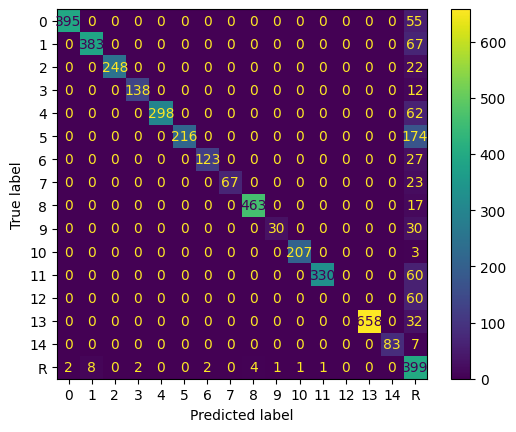

In [ ]:
cm = confusion_matrix(y_combined, y_pred_modified, labels=newest_label)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=newest_label)
cm_disp.plot()
plt.show()

In [ ]:
str_label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', 'R']
print(classification_report(y_combined, y_pred_modified, target_names=None, digits=3))

              precision    recall  f1-score   support

           0      0.995     0.878     0.933       450
           1      0.980     0.851     0.911       450
          10      0.995     0.986     0.990       210
          11      0.997     0.846     0.915       390
          12      0.000     0.000     0.000        60
          13      1.000     0.954     0.976       690
          14      1.000     0.922     0.960        90
           2      1.000     0.919     0.958       270
           3      0.986     0.920     0.952       150
           4      1.000     0.828     0.906       360
           5      1.000     0.554     0.713       390
           6      0.984     0.820     0.895       150
           7      1.000     0.744     0.854        90
           8      0.991     0.965     0.978       480
           9      0.968     0.500     0.659        60
           R      0.380     0.950     0.543       420

    accuracy                          0.857      4710
   macro avg      0.892   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Scale 5

In [ ]:
y_pred_real, y_pred_modified, thresholds = predict_rejection(test_prediction, 5., mu_stds)

In [ ]:
print(thresholds)

[0.999988111440472, 0.9999988688359819, 0.999998767286659, 0.9999997398640034, 0.9999986324098815, 0.9999846752828184, 0.9999997042317131, 0.999996705229292, 0.9996321320001097, 0.9999734661333256, 0.9999999487004897, 0.9999975420493773, 1.0, 0.9999585721118265, 0.9997438903044885]


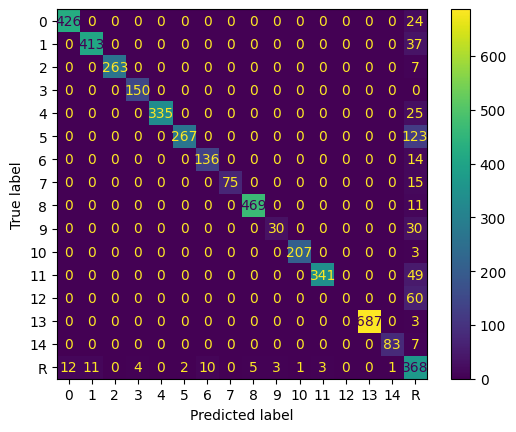

In [ ]:
cm = confusion_matrix(y_combined, y_pred_modified, labels=newest_label)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=newest_label)
cm_disp.plot()
plt.show()

In [ ]:
str_label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', 'R']
print(classification_report(y_combined, y_pred_modified, target_names=None, digits=3))

              precision    recall  f1-score   support

           0      0.973     0.947     0.959       450
           1      0.974     0.918     0.945       450
          10      0.995     0.986     0.990       210
          11      0.991     0.874     0.929       390
          12      0.000     0.000     0.000        60
          13      1.000     0.996     0.998       690
          14      0.988     0.922     0.954        90
           2      1.000     0.974     0.987       270
           3      0.974     1.000     0.987       150
           4      1.000     0.931     0.964       360
           5      0.993     0.685     0.810       390
           6      0.932     0.907     0.919       150
           7      1.000     0.833     0.909        90
           8      0.989     0.977     0.983       480
           9      0.909     0.500     0.645        60
           R      0.474     0.876     0.615       420

    accuracy                          0.902      4710
   macro avg      0.887   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Scale 10

In [ ]:
y_pred_real, y_pred_modified, thresholds = predict_rejection(test_prediction, 10., mu_stds)

In [ ]:
print(thresholds)

[0.999976222880944, 0.9999977376719638, 0.9999975345733182, 0.9999994797280067, 0.9999972648197629, 0.9999693505656367, 0.9999994084634263, 0.9999934104585839, 0.9992642640002194, 0.9999469322666512, 0.9999998974009793, 0.9999950840987547, 1.0, 0.999917144223653, 0.999487780608977]


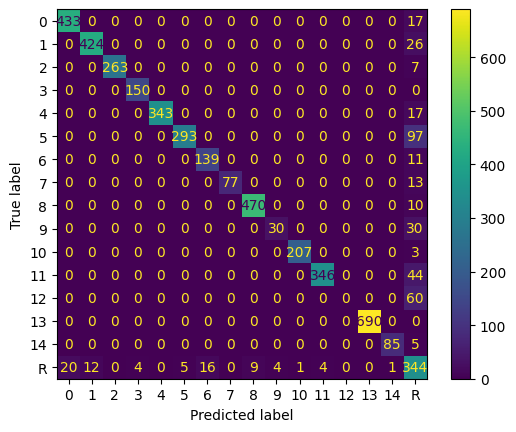

In [ ]:
cm = confusion_matrix(y_combined, y_pred_modified, labels=newest_label)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=newest_label)
cm_disp.plot()
plt.show()

In [ ]:
str_label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', 'R']
print(classification_report(y_combined, y_pred_modified, target_names=None, digits=3))

              precision    recall  f1-score   support

           0      0.956     0.962     0.959       450
           1      0.972     0.942     0.957       450
          10      0.995     0.986     0.990       210
          11      0.989     0.887     0.935       390
          12      0.000     0.000     0.000        60
          13      1.000     1.000     1.000       690
          14      0.988     0.944     0.966        90
           2      1.000     0.974     0.987       270
           3      0.974     1.000     0.987       150
           4      1.000     0.953     0.976       360
           5      0.983     0.751     0.852       390
           6      0.897     0.927     0.911       150
           7      1.000     0.856     0.922        90
           8      0.981     0.979     0.980       480
           9      0.882     0.500     0.638        60
           R      0.503     0.819     0.623       420

    accuracy                          0.912      4710
   macro avg      0.883   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Scale 15

In [ ]:
y_pred_real, y_pred_modified, thresholds = predict_rejection(test_prediction, 15, mu_stds)

In [ ]:
print(thresholds)

[0.999964334321416, 0.9999966065079456, 0.9999963018599772, 0.9999992195920101, 0.9999958972296444, 0.9999540258484552, 0.9999991126951393, 0.9999901156878759, 0.998896396000329, 0.9999203983999768, 0.999999846101469, 0.999992626148132, 1.0, 0.9998757163354794, 0.9992316709134654]


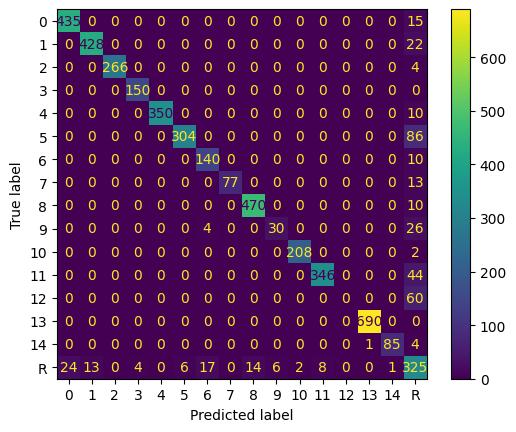

In [ ]:
cm = confusion_matrix(y_combined, y_pred_modified, labels=newest_label)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=newest_label)
cm_disp.plot()
plt.show()

In [ ]:
str_label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', 'R']
print(classification_report(y_combined, y_pred_modified, target_names=None, digits=3))

              precision    recall  f1-score   support

           0      0.948     0.967     0.957       450
           1      0.971     0.951     0.961       450
          10      0.990     0.990     0.990       210
          11      0.977     0.887     0.930       390
          12      0.000     0.000     0.000        60
          13      0.999     1.000     0.999       690
          14      0.988     0.944     0.966        90
           2      1.000     0.985     0.993       270
           3      0.974     1.000     0.987       150
           4      1.000     0.972     0.986       360
           5      0.981     0.779     0.869       390
           6      0.870     0.933     0.900       150
           7      1.000     0.856     0.922        90
           8      0.971     0.979     0.975       480
           9      0.833     0.500     0.625        60
           R      0.515     0.774     0.618       420

    accuracy                          0.914      4710
   macro avg      0.876   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Scale 20

In [ ]:
y_pred_real, y_pred_modified, thresholds = predict_rejection(test_prediction, 20., mu_stds)

In [ ]:
print(thresholds)

[0.999952445761888, 0.9999954753439275, 0.9999950691466363, 0.9999989594560135, 0.9999945296395258, 0.9999387011312736, 0.9999988169268524, 0.9999868209171678, 0.9985285280004387, 0.9998938645333024, 0.9999997948019586, 0.9999901681975093, 1.0, 0.9998342884473058, 0.998975561217954]


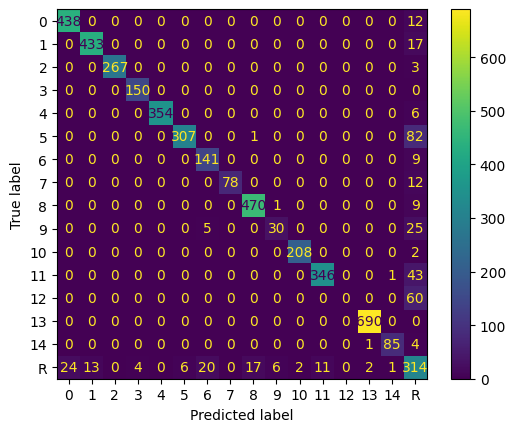

In [ ]:
cm = confusion_matrix(y_combined, y_pred_modified, labels=newest_label)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=newest_label)
cm_disp.plot()
plt.show()

In [ ]:
str_label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', 'R']
print(classification_report(y_combined, y_pred_modified, target_names=None, digits=3))

              precision    recall  f1-score   support

           0      0.948     0.973     0.961       450
           1      0.971     0.962     0.967       450
          10      0.990     0.990     0.990       210
          11      0.969     0.887     0.926       390
          12      0.000     0.000     0.000        60
          13      0.996     1.000     0.998       690
          14      0.977     0.944     0.960        90
           2      1.000     0.989     0.994       270
           3      0.974     1.000     0.987       150
           4      1.000     0.983     0.992       360
           5      0.981     0.787     0.873       390
           6      0.849     0.940     0.892       150
           7      1.000     0.867     0.929        90
           8      0.963     0.979     0.971       480
           9      0.811     0.500     0.619        60
           R      0.525     0.748     0.617       420

    accuracy                          0.915      4710
   macro avg      0.872   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 128x128

In [ ]:
test_data = np.load('/content/drive/MyDrive/Cekripci/Data/Test/Seen/seen_test_128x128.npy')
unseen_data = np.load('/content/drive/MyDrive/Cekripci/Data/Test/Unseen/unseen_test_128x128.npy')
EfficientNetB1_00004_128 = tf.keras.models.load_model('/content/drive/My Drive/Cekripci/Saved Model/EfficientNetB1_00004_128.h5')

In [ ]:
print(unseen_data.shape, unseen_label.shape)
print(test_data.shape, test_label.shape)

(420, 128, 128, 3) (420,)
(4290, 128, 128, 3) (4290,)


In [ ]:
# Combine both seen and unseen dataset
X_combined = np.concatenate([test_data, unseen_data])
y_combined = np.concatenate([test_label, unseen_label])

In [ ]:
print(X_combined.shape, y_combined.shape)

(4710, 128, 128, 3) (4710,)


Predict

In [ ]:
seen_train_X_pred = EfficientNetB1_00004_128.predict(X_train)
print(seen_train_X_pred.shape)

333/333 [==============================] - 21s 31ms/step
(10640, 15)


In [ ]:
seen_train_X_pred

array([[0.10462035, 0.35284334, 0.9999981 , ..., 0.06550321, 0.18385792,
        0.17560084],
       [0.5159682 , 0.1826973 , 0.05384993, ..., 0.2167935 , 0.45397282,
        0.113491  ],
       [0.14686319, 0.2530944 , 0.23785092, ..., 0.35482433, 0.9999975 ,
        0.18902875],
       ...,
       [0.25022507, 0.35701552, 0.30685896, ..., 0.18333171, 0.9999397 ,
        0.597359  ],
       [0.57500035, 0.13404705, 0.19540395, ..., 0.23092817, 0.99999595,
        0.26224837],
       [0.27517554, 0.31622148, 0.11128444, ..., 0.2759236 , 0.9999943 ,
        0.10821407]], dtype=float32)

In [ ]:
print(y_train)
print(y_train.shape)

[ 2  9 13 ... 13 13 13]
(10640,)


In [ ]:
def fit(prob_pos_X):
    prob_pos = [p for p in prob_pos_X] + [2-p for p in prob_pos_X]
    pos_mu, pos_std = dist_model.fit(prob_pos)
    return pos_mu, pos_std

In [ ]:
mu_stds = []
for i in range(len(range(15))):
    ''' prediction here is the model predicting X_train '''
    pos_mu, pos_std = fit(seen_train_X_pred[y_train==i, i])
    mu_stds.append([pos_mu, pos_std])

In [ ]:
print(mu_stds)

[[1.0, 8.932175391303887e-06], [1.0, 2.5993930958309767e-05], [1.0, 7.784269828799937e-06], [1.0, 1.3805715134344953e-05], [1.0, 1.4336094314401312e-05], [1.0, 9.908962961979222e-06], [1.0, 3.5405545497359066e-05], [1.0, 2.0286365260566773e-05], [1.0, 4.905878683193589e-06], [1.0, 8.521935741610994e-06], [1.0, 5.300959883292247e-06], [1.0, 2.4142381663249955e-05], [1.0, 1.019686652847635e-06], [1.0, 1.550759494907592e-05], [1.0, 0.00012087078338853746]]


In [ ]:
test_prediction = EfficientNetB1_00004_128.predict(X_combined)

148/148 [==============================] - 5s 33ms/step


In [ ]:
def predict_rejection(prediction, scale, mu_stds):
  y_pred_real = []
  y_pred_mod = []
  thresholds = [0] * 15 # initialize array with size (3, )
  for p in prediction:
    max_class = np.argmax(p)
    y_pred_real.append(max_class)
    max_value = np.max(p) # maximum probability
    # print("Class {}: {}".format(max_class, max_value))
    threshold = max(0.5, 1 - scale * mu_stds[max_class][1])
    thresholds[max_class] = threshold
    if max_value > threshold:
      y_pred_mod.append(max_class)
    else:
      y_pred_mod.append("R")

  return y_pred_real, y_pred_mod, thresholds

In [ ]:
newest_label = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 'R']

#### Scale 1

In [ ]:
y_pred_real, y_pred_modified, thresholds = predict_rejection(test_prediction, 1., mu_stds)

In [ ]:
print(thresholds)

[0.9999910678246087, 0.9999740060690417, 0.9999922157301712, 0.9999861942848657, 0.9999856639056856, 0.9999900910370381, 0.9999645944545026, 0.9999797136347395, 0.9999950941213168, 0.9999914780642584, 0.9999946990401167, 0.9999758576183367, 0.9999989803133471, 0.9999844924050509, 0.9998791292166115]


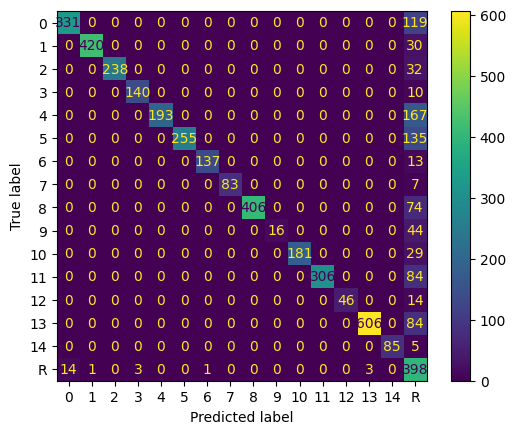

In [ ]:
cm = confusion_matrix(y_combined, y_pred_modified, labels=newest_label)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=newest_label)
cm_disp.plot()
plt.show()

In [ ]:
str_label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', 'R']
print(classification_report(y_combined, y_pred_modified, target_names=None, digits=3))

              precision    recall  f1-score   support

           0      0.959     0.736     0.833       450
           1      0.998     0.933     0.964       450
          10      1.000     0.862     0.926       210
          11      1.000     0.785     0.879       390
          12      1.000     0.767     0.868        60
          13      0.995     0.878     0.933       690
          14      1.000     0.944     0.971        90
           2      1.000     0.881     0.937       270
           3      0.979     0.933     0.956       150
           4      1.000     0.536     0.698       360
           5      1.000     0.654     0.791       390
           6      0.993     0.913     0.951       150
           7      1.000     0.922     0.960        90
           8      1.000     0.846     0.916       480
           9      1.000     0.267     0.421        60
           R      0.320     0.948     0.478       420

    accuracy                          0.815      4710
   macro avg      0.953   

#### Scale 5

In [ ]:
y_pred_real, y_pred_modified, thresholds = predict_rejection(test_prediction, 5., mu_stds)

In [ ]:
print(thresholds)

[0.9999553391230435, 0.9998700303452085, 0.999961078650856, 0.9999309714243283, 0.999928319528428, 0.9999504551851901, 0.9998229722725132, 0.9998985681736972, 0.999975470606584, 0.9999573903212919, 0.9999734952005835, 0.9998792880916838, 0.9999949015667358, 0.9999224620252546, 0.9993956460830573]


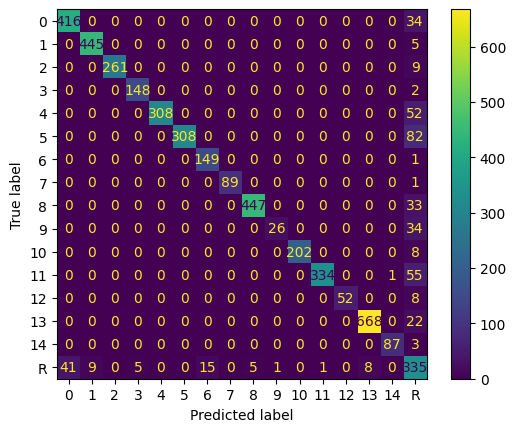

In [ ]:
cm = confusion_matrix(y_combined, y_pred_modified, labels=newest_label)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=newest_label)
cm_disp.plot()
plt.show()

In [ ]:
str_label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', 'R']
print(classification_report(y_combined, y_pred_modified, target_names=None, digits=3))

              precision    recall  f1-score   support

           0      0.910     0.924     0.917       450
           1      0.980     0.989     0.985       450
          10      1.000     0.962     0.981       210
          11      0.997     0.856     0.921       390
          12      1.000     0.867     0.929        60
          13      0.988     0.968     0.978       690
          14      0.989     0.967     0.978        90
           2      1.000     0.967     0.983       270
           3      0.967     0.987     0.977       150
           4      1.000     0.856     0.922       360
           5      1.000     0.790     0.883       390
           6      0.909     0.993     0.949       150
           7      1.000     0.989     0.994        90
           8      0.989     0.931     0.959       480
           9      0.963     0.433     0.598        60
           R      0.490     0.798     0.607       420

    accuracy                          0.908      4710
   macro avg      0.949   

#### Scale 10

In [ ]:
y_pred_real, y_pred_modified, thresholds = predict_rejection(test_prediction, 10., mu_stds)

In [ ]:
print(thresholds)

[0.9999106782460869, 0.9997400606904169, 0.999922157301712, 0.9998619428486566, 0.999856639056856, 0.9999009103703802, 0.9996459445450264, 0.9997971363473943, 0.9999509412131681, 0.9999147806425839, 0.9999469904011671, 0.9997585761833675, 0.9999898031334715, 0.9998449240505093, 0.9987912921661146]


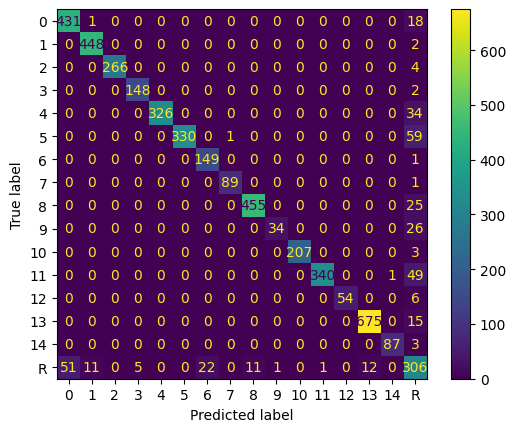

In [ ]:
cm = confusion_matrix(y_combined, y_pred_modified, labels=newest_label)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=newest_label)
cm_disp.plot()
plt.show()

In [ ]:
str_label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', 'R']
print(classification_report(y_combined, y_pred_modified, target_names=None, digits=3))

              precision    recall  f1-score   support

           0      0.894     0.958     0.925       450
           1      0.974     0.996     0.985       450
          10      1.000     0.986     0.993       210
          11      0.997     0.872     0.930       390
          12      1.000     0.900     0.947        60
          13      0.983     0.978     0.980       690
          14      0.989     0.967     0.978        90
           2      1.000     0.985     0.993       270
           3      0.967     0.987     0.977       150
           4      1.000     0.906     0.950       360
           5      1.000     0.846     0.917       390
           6      0.871     0.993     0.928       150
           7      0.989     0.989     0.989        90
           8      0.976     0.948     0.962       480
           9      0.971     0.567     0.716        60
           R      0.552     0.729     0.628       420

    accuracy                          0.923      4710
   macro avg      0.948   

#### Scale 15

In [ ]:
y_pred_real, y_pred_modified, thresholds = predict_rejection(test_prediction, 15, mu_stds)

In [ ]:
print(thresholds)

[0.9998660173691304, 0.9996100910356254, 0.999883235952568, 0.9997929142729848, 0.9997849585852839, 0.9998513655555703, 0.9994689168175396, 0.9996957045210915, 0.9999264118197521, 0.9998721709638758, 0.9999204856017506, 0.9996378642750513, 0.9999847047002073, 0.9997673860757639, 0.9981869382491719]


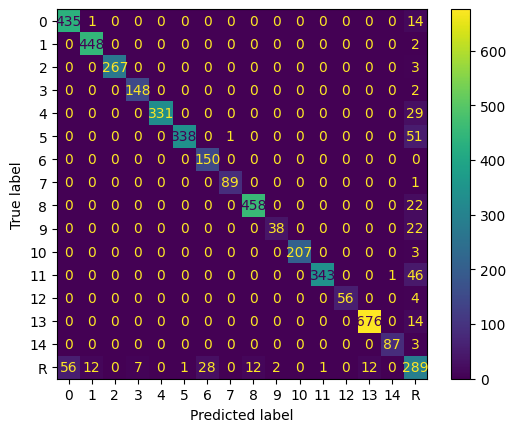

In [ ]:
cm = confusion_matrix(y_combined, y_pred_modified, labels=newest_label)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=newest_label)
cm_disp.plot()
plt.show()

In [ ]:
str_label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', 'R']
print(classification_report(y_combined, y_pred_modified, target_names=None, digits=3))

              precision    recall  f1-score   support

           0      0.886     0.967     0.925       450
           1      0.972     0.996     0.984       450
          10      1.000     0.986     0.993       210
          11      0.997     0.879     0.935       390
          12      1.000     0.933     0.966        60
          13      0.983     0.980     0.981       690
          14      0.989     0.967     0.978        90
           2      1.000     0.989     0.994       270
           3      0.955     0.987     0.970       150
           4      1.000     0.919     0.958       360
           5      0.997     0.867     0.927       390
           6      0.843     1.000     0.915       150
           7      0.989     0.989     0.989        90
           8      0.974     0.954     0.964       480
           9      0.950     0.633     0.760        60
           R      0.572     0.688     0.625       420

    accuracy                          0.926      4710
   macro avg      0.944   

#### Scale 20

In [ ]:
y_pred_real, y_pred_modified, thresholds = predict_rejection(test_prediction, 20., mu_stds)

In [ ]:
print(thresholds)

[0.999821356492174, 0.9994801213808338, 0.999844314603424, 0.9997238856973131, 0.999713278113712, 0.9998018207407604, 0.9992918890900528, 0.9995942726947886, 0.9999018824263362, 0.9998295612851678, 0.9998939808023342, 0.999517152366735, 0.999979606266943, 0.9996898481010185, 0.9975825843322292]


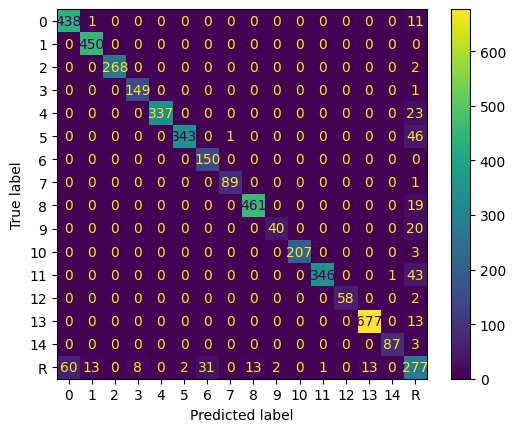

In [ ]:
cm = confusion_matrix(y_combined, y_pred_modified, labels=newest_label)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=newest_label)
cm_disp.plot()
plt.show()

In [ ]:
str_label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', 'R']
print(classification_report(y_combined, y_pred_modified, target_names=None, digits=3))

              precision    recall  f1-score   support

           0      0.880     0.973     0.924       450
           1      0.970     1.000     0.985       450
          10      1.000     0.986     0.993       210
          11      0.997     0.887     0.939       390
          12      1.000     0.967     0.983        60
          13      0.981     0.981     0.981       690
          14      0.989     0.967     0.978        90
           2      1.000     0.993     0.996       270
           3      0.949     0.993     0.971       150
           4      1.000     0.936     0.967       360
           5      0.994     0.879     0.933       390
           6      0.829     1.000     0.906       150
           7      0.989     0.989     0.989        90
           8      0.973     0.960     0.966       480
           9      0.952     0.667     0.784        60
           R      0.597     0.660     0.627       420

    accuracy                          0.929      4710
   macro avg      0.944   

### 200x200

In [ ]:
test_data = np.load('/content/drive/MyDrive/Cekripci/Data/Test/Seen/seen_test_200x200.npy')
unseen_data = np.load('/content/drive/MyDrive/Cekripci/Data/Test/Unseen/unseen_test_200x200.npy')
EfficientNetB1_00007_200 = tf.keras.models.load_model('/content/drive/My Drive/Cekripci/Saved Model/EfficientNetB1_00007_200.h5')

In [ ]:
print(unseen_data.shape, unseen_label.shape)
print(test_data.shape, test_label.shape)

(420, 200, 200, 3) (420,)
(4290, 200, 200, 3) (4290,)


In [ ]:
# Combine both seen and unseen dataset
X_combined = np.concatenate([test_data, unseen_data])
y_combined = np.concatenate([test_label, unseen_label])

In [ ]:
print(X_combined.shape, y_combined.shape)

(4710, 200, 200, 3) (4710,)


Predict

In [ ]:
seen_train_X_pred = EfficientNetB1_00007_200.predict(X_train)
print(seen_train_X_pred.shape)

333/333 [==============================] - 32s 63ms/step
(10640, 15)


In [ ]:
seen_train_X_pred

array([[0.05978954, 0.273889  , 0.99998736, ..., 0.08599912, 0.02112042,
        0.5357674 ],
       [0.2469291 , 0.07638291, 0.25961584, ..., 0.14892192, 0.08110653,
        0.11180604],
       [0.12543237, 0.16302957, 0.16127743, ..., 0.04754471, 0.99999964,
        0.24649085],
       ...,
       [0.2781433 , 0.51866275, 0.15699284, ..., 0.02708502, 0.9999982 ,
        0.08279428],
       [0.3212773 , 0.09409599, 0.157734  , ..., 0.00951851, 0.9999999 ,
        0.09684499],
       [0.21571666, 0.395322  , 0.25303638, ..., 0.0621905 , 0.99999833,
        0.03942719]], dtype=float32)

In [ ]:
print(y_train)
print(y_train.shape)

[ 2  9 13 ... 13 13 13]
(10640,)


In [ ]:
def fit(prob_pos_X):
    prob_pos = [p for p in prob_pos_X] + [2-p for p in prob_pos_X]
    pos_mu, pos_std = dist_model.fit(prob_pos)
    return pos_mu, pos_std

In [ ]:
mu_stds = []
for i in range(len(range(15))):
    ''' prediction here is the model predicting X_train '''
    pos_mu, pos_std = fit(seen_train_X_pred[y_train==i, i])
    mu_stds.append([pos_mu, pos_std])

In [ ]:
print(mu_stds)

[[1.0, 0.000239163168097354], [1.0, 5.405661408509116e-05], [1.0, 0.00015142109784287562], [1.0, 1.1217298340338207e-05], [1.0, 4.537924549234925e-06], [1.0, 8.57766116151263e-06], [1.0, 3.480747091544244e-05], [1.0, 4.441549704265e-06], [1.0, 1.7059370502938558e-05], [1.0, 8.118469218603292e-05], [1.0, 1.895425343550895e-05], [1.0, 4.223960531954079e-06], [1.0, 8.076793312723255e-07], [1.0, 6.953513238225303e-06], [1.0, 1.726465281316898e-05]]


In [ ]:
test_prediction = EfficientNetB1_00007_200.predict(X_combined)

148/148 [==============================] - 10s 65ms/step


In [ ]:
def predict_rejection(prediction, scale, mu_stds):
  y_pred_real = []
  y_pred_mod = []
  thresholds = [0] * 15 # initialize array with size (3, )
  for p in prediction:
    max_class = np.argmax(p)
    y_pred_real.append(max_class)
    max_value = np.max(p) # maximum probability
    # print("Class {}: {}".format(max_class, max_value))
    threshold = max(0.5, 1 - scale * mu_stds[max_class][1])
    thresholds[max_class] = threshold
    if max_value > threshold:
      y_pred_mod.append(max_class)
    else:
      y_pred_mod.append("R")

  return y_pred_real, y_pred_mod, thresholds

In [ ]:
newest_label = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 'R']

#### Scale 1

In [ ]:
y_pred_real, y_pred_modified, thresholds = predict_rejection(test_prediction, 1., mu_stds)

In [ ]:
print(thresholds)

[0.9997608368319026, 0.9999459433859149, 0.9998485789021572, 0.9999887827016597, 0.9999954620754508, 0.9999914223388385, 0.9999651925290846, 0.9999955584502958, 0.9999829406294971, 0.999918815307814, 0.9999810457465645, 0.9999957760394681, 0.9999991923206687, 0.9999930464867618, 0.9999827353471868]


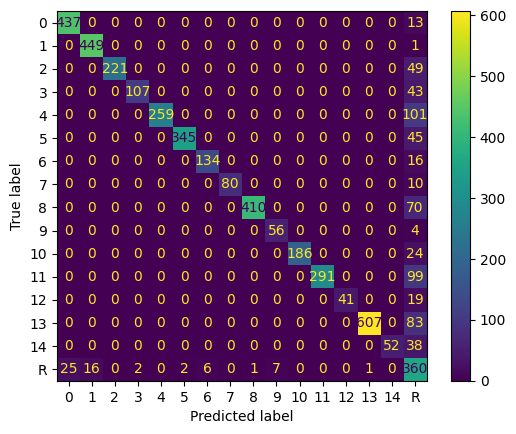

In [ ]:
cm = confusion_matrix(y_combined, y_pred_modified, labels=newest_label)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=newest_label)
cm_disp.plot()
plt.show()

In [ ]:
str_label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', 'R']
print(classification_report(y_combined, y_pred_modified, target_names=None, digits=3))

              precision    recall  f1-score   support

           0      0.946     0.971     0.958       450
           1      0.966     0.998     0.981       450
          10      1.000     0.886     0.939       210
          11      1.000     0.746     0.855       390
          12      1.000     0.683     0.812        60
          13      0.998     0.880     0.935       690
          14      1.000     0.578     0.732        90
           2      1.000     0.819     0.900       270
           3      0.982     0.713     0.826       150
           4      1.000     0.719     0.837       360
           5      0.994     0.885     0.936       390
           6      0.957     0.893     0.924       150
           7      1.000     0.889     0.941        90
           8      0.998     0.854     0.920       480
           9      0.889     0.933     0.911        60
           R      0.369     0.857     0.516       420

    accuracy                          0.857      4710
   macro avg      0.944   

#### Scale 5

In [ ]:
y_pred_real, y_pred_modified, thresholds = predict_rejection(test_prediction, 5., mu_stds)

In [ ]:
print(thresholds)

[0.9988041841595132, 0.9997297169295746, 0.9992428945107856, 0.9999439135082983, 0.9999773103772538, 0.9999571116941924, 0.9998259626454228, 0.9999777922514786, 0.9999147031474853, 0.9995940765390698, 0.9999052287328225, 0.9999788801973403, 0.9999959616033436, 0.9999652324338089, 0.9999136767359341]


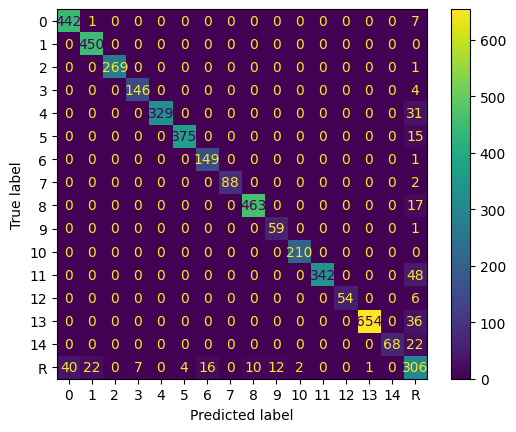

In [ ]:
cm = confusion_matrix(y_combined, y_pred_modified, labels=newest_label)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=newest_label)
cm_disp.plot()
plt.show()

In [ ]:
str_label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', 'R']
print(classification_report(y_combined, y_pred_modified, target_names=None, digits=3))

              precision    recall  f1-score   support

           0      0.917     0.982     0.948       450
           1      0.951     1.000     0.975       450
          10      0.991     1.000     0.995       210
          11      1.000     0.877     0.934       390
          12      1.000     0.900     0.947        60
          13      0.998     0.948     0.972       690
          14      1.000     0.756     0.861        90
           2      1.000     0.996     0.998       270
           3      0.954     0.973     0.964       150
           4      1.000     0.914     0.955       360
           5      0.989     0.962     0.975       390
           6      0.903     0.993     0.946       150
           7      1.000     0.978     0.989        90
           8      0.979     0.965     0.972       480
           9      0.831     0.983     0.901        60
           R      0.616     0.729     0.667       420

    accuracy                          0.935      4710
   macro avg      0.946   

#### Scale 10

In [ ]:
y_pred_real, y_pred_modified, thresholds = predict_rejection(test_prediction, 10., mu_stds)

In [ ]:
print(thresholds)

[0.9976083683190264, 0.999459433859149, 0.9984857890215713, 0.9998878270165966, 0.9999546207545077, 0.9999142233883849, 0.9996519252908456, 0.9999555845029573, 0.9998294062949706, 0.9991881530781397, 0.9998104574656449, 0.9999577603946804, 0.9999919232066873, 0.9999304648676177, 0.9998273534718684]


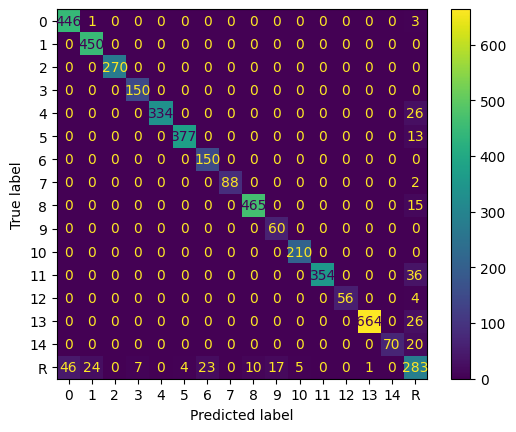

In [ ]:
cm = confusion_matrix(y_combined, y_pred_modified, labels=newest_label)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=newest_label)
cm_disp.plot()
plt.show()

In [ ]:
str_label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', 'R']
print(classification_report(y_combined, y_pred_modified, target_names=None, digits=3))

              precision    recall  f1-score   support

           0      0.907     0.991     0.947       450
           1      0.947     1.000     0.973       450
          10      0.977     1.000     0.988       210
          11      1.000     0.908     0.952       390
          12      1.000     0.933     0.966        60
          13      0.998     0.962     0.980       690
          14      1.000     0.778     0.875        90
           2      1.000     1.000     1.000       270
           3      0.955     1.000     0.977       150
           4      1.000     0.928     0.963       360
           5      0.990     0.967     0.978       390
           6      0.867     1.000     0.929       150
           7      1.000     0.978     0.989        90
           8      0.979     0.969     0.974       480
           9      0.779     1.000     0.876        60
           R      0.661     0.674     0.667       420

    accuracy                          0.940      4710
   macro avg      0.941   

#### Scale 15

In [ ]:
y_pred_real, y_pred_modified, thresholds = predict_rejection(test_prediction, 15, mu_stds)

In [ ]:
print(thresholds)

[0.9964125524785397, 0.9991891507887236, 0.9977286835323569, 0.9998317405248949, 0.9999319311317615, 0.9998713350825773, 0.9994778879362683, 0.999933376754436, 0.999744109442456, 0.9987822296172095, 0.9997156861984674, 0.9999366405920207, 0.9999878848100309, 0.9998956973014266, 0.9997410302078025]


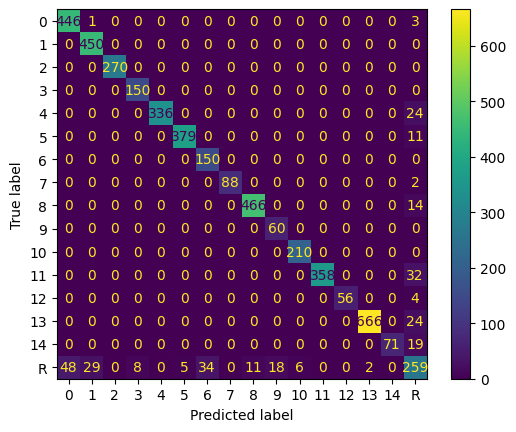

In [ ]:
cm = confusion_matrix(y_combined, y_pred_modified, labels=newest_label)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=newest_label)
cm_disp.plot()
plt.show()

In [ ]:
str_label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', 'R']
print(classification_report(y_combined, y_pred_modified, target_names=None, digits=3))

              precision    recall  f1-score   support

           0      0.903     0.991     0.945       450
           1      0.938     1.000     0.968       450
          10      0.972     1.000     0.986       210
          11      1.000     0.918     0.957       390
          12      1.000     0.933     0.966        60
          13      0.997     0.965     0.981       690
          14      1.000     0.789     0.882        90
           2      1.000     1.000     1.000       270
           3      0.949     1.000     0.974       150
           4      1.000     0.933     0.966       360
           5      0.987     0.972     0.979       390
           6      0.815     1.000     0.898       150
           7      1.000     0.978     0.989        90
           8      0.977     0.971     0.974       480
           9      0.769     1.000     0.870        60
           R      0.661     0.617     0.638       420

    accuracy                          0.937      4710
   macro avg      0.936   

#### Scale 20

In [ ]:
y_pred_real, y_pred_modified, thresholds = predict_rejection(test_prediction, 20., mu_stds)

In [ ]:
print(thresholds)

[0.9952167366380529, 0.9989188677182982, 0.9969715780431425, 0.9997756540331932, 0.9999092415090153, 0.9998284467767697, 0.9993038505816911, 0.9999111690059147, 0.9996588125899413, 0.9983763061562794, 0.9996209149312898, 0.999915520789361, 0.9999838464133746, 0.9998609297352355, 0.9996547069437366]


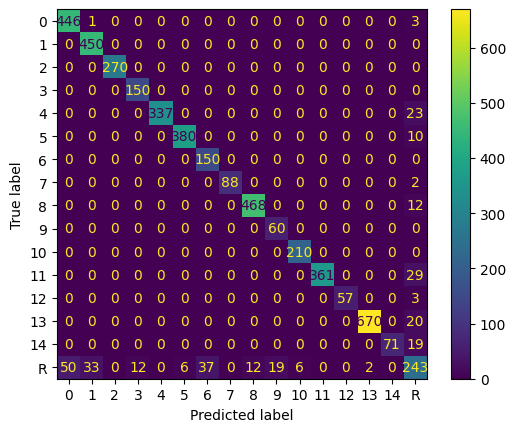

In [ ]:
cm = confusion_matrix(y_combined, y_pred_modified, labels=newest_label)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=newest_label)
cm_disp.plot()
plt.show()

In [ ]:
str_label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', 'R']
print(classification_report(y_combined, y_pred_modified, target_names=None, digits=3))

              precision    recall  f1-score   support

           0      0.899     0.991     0.943       450
           1      0.930     1.000     0.964       450
          10      0.972     1.000     0.986       210
          11      1.000     0.926     0.961       390
          12      1.000     0.950     0.974        60
          13      0.997     0.971     0.984       690
          14      1.000     0.789     0.882        90
           2      1.000     1.000     1.000       270
           3      0.926     1.000     0.962       150
           4      1.000     0.936     0.967       360
           5      0.984     0.974     0.979       390
           6      0.802     1.000     0.890       150
           7      1.000     0.978     0.989        90
           8      0.975     0.975     0.975       480
           9      0.759     1.000     0.863        60
           R      0.668     0.579     0.620       420

    accuracy                          0.937      4710
   macro avg      0.932   

## Unseen Test II

In [ ]:
test_label = np.load('/content/drive/MyDrive/Cekripci/Data/Test/Seen/label_seen_test.npy')
unseen_label = np.load('/content/drive/MyDrive/Cekripci/Data/Test/Unseen/label_banner_unseen.npy')

### 32x32

In [ ]:
test_data = np.load('/content/drive/MyDrive/Cekripci/Data/Test/Seen/seen_test_32x32.npy')
unseen_data = np.load('/content/drive/MyDrive/Cekripci/Data/Test/Unseen/banner_unseen_32x32.npy')
EfficientNetB1_00007_32 = tf.keras.models.load_model('/content/drive/My Drive/Cekripci/Saved Model/EfficientNetB1_00007_32.h5')

In [ ]:
print(unseen_data.shape, unseen_label.shape)
print(test_data.shape, test_label.shape)

(180, 32, 32, 3) (180,)
(4290, 32, 32, 3) (4290,)


In [ ]:
# Combine both seen and unseen dataset
X_combined = np.concatenate([test_data, unseen_data])
y_combined = np.concatenate([test_label, unseen_label])

In [ ]:
print(X_combined.shape, y_combined.shape)

(4470, 32, 32, 3) (4470,)


Predict

In [ ]:
seen_train_X_pred = EfficientNetB1_00007_32.predict(X_train)
print(seen_train_X_pred.shape)

333/333 [==============================] - 12s 28ms/step
(10640, 15)


In [ ]:
seen_train_X_pred

array([[0.63641167, 0.04878541, 1.        , ..., 0.11071682, 0.010019  ,
        0.02888068],
       [0.00594623, 0.00168135, 0.02125516, ..., 0.04491905, 0.09619943,
        0.00417606],
       [0.09499928, 0.01374209, 0.0123185 , ..., 0.09586433, 0.9999999 ,
        0.23615715],
       ...,
       [0.12211327, 0.02722248, 0.076193  , ..., 0.14199394, 0.9999838 ,
        0.4537715 ],
       [0.08300298, 0.00967424, 0.03205174, ..., 0.14100824, 0.99999535,
        0.36524823],
       [0.08541122, 0.01257622, 0.05860227, ..., 0.11936014, 0.9999957 ,
        0.40442556]], dtype=float32)

In [ ]:
print(y_train)
print(y_train.shape)

[ 2  9 13 ... 13 13 13]
(10640,)


In [ ]:
def fit(prob_pos_X):
    prob_pos = [p for p in prob_pos_X] + [2-p for p in prob_pos_X]
    pos_mu, pos_std = dist_model.fit(prob_pos)
    return pos_mu, pos_std

In [ ]:
mu_stds = []
for i in range(len(range(15))):
    ''' prediction here is the model predicting X_train '''
    pos_mu, pos_std = fit(seen_train_X_pred[y_train==i, i])
    mu_stds.append([pos_mu, pos_std])

In [ ]:
print(mu_stds)

[[1.0, 2.377711905601299e-06], [1.0, 2.26232803623214e-07], [1.0, 2.465426681841811e-07], [1.0, 5.202719932460603e-08], [1.0, 2.735180237053726e-07], [1.0, 3.064943436321953e-06], [1.0, 5.9153657377461805e-08], [1.0, 6.589541416079601e-07], [1.0, 7.357359997806461e-05], [1.0, 5.306773334878117e-06], [1.0, 1.0259902069853192e-08], [1.0, 4.915901245328419e-07], [1.0, 0.0], [1.0, 8.28557763470691e-06], [1.0, 5.1221939102302124e-05]]


In [ ]:
test_prediction = EfficientNetB1_00007_32.predict(X_combined)

140/140 [==============================] - 5s 35ms/step


In [ ]:
def predict_rejection(prediction, scale, mu_stds):
  y_pred_real = []
  y_pred_mod = []
  thresholds = [0] * 15 # initialize array with size (3, )
  for p in prediction:
    max_class = np.argmax(p)
    y_pred_real.append(max_class)
    max_value = np.max(p) # maximum probability
    # print("Class {}: {}".format(max_class, max_value))
    threshold = max(0.5, 1 - scale * mu_stds[max_class][1])
    thresholds[max_class] = threshold
    if max_value > threshold:
      y_pred_mod.append(max_class)
    else:
      y_pred_mod.append("R")

  return y_pred_real, y_pred_mod, thresholds

In [ ]:
newest_label = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 'R']

#### Scale 1

In [ ]:
y_pred_real, y_pred_modified, thresholds = predict_rejection(test_prediction, 1., mu_stds)

In [ ]:
print(thresholds)

[0.9999976222880944, 0.9999997737671964, 0.9999997534573318, 0.9999999479728007, 0.9999997264819763, 0.9999969350565637, 0.9999999408463426, 0.9999993410458584, 0.9999264264000219, 0.9999946932266651, 0.999999989740098, 0.9999995084098755, 1.0, 0.9999917144223653, 0.9999487780608977]


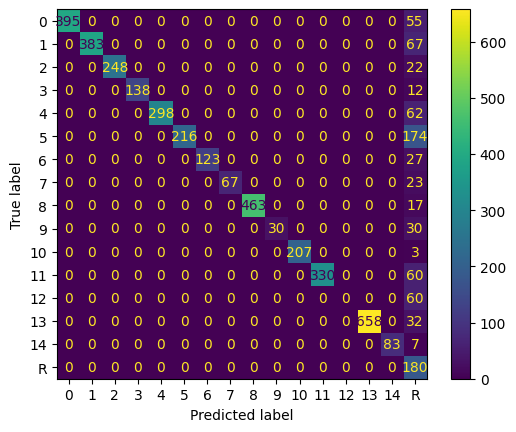

In [ ]:
cm = confusion_matrix(y_combined, y_pred_modified, labels=newest_label)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=newest_label)
cm_disp.plot()
plt.show()

In [ ]:
str_label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', 'R']
print(classification_report(y_combined, y_pred_modified, target_names=None, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.878     0.935       450
           1      1.000     0.851     0.920       450
          10      1.000     0.986     0.993       210
          11      1.000     0.846     0.917       390
          12      0.000     0.000     0.000        60
          13      1.000     0.954     0.976       690
          14      1.000     0.922     0.960        90
           2      1.000     0.919     0.958       270
           3      1.000     0.920     0.958       150
           4      1.000     0.828     0.906       360
           5      1.000     0.554     0.713       390
           6      1.000     0.820     0.901       150
           7      1.000     0.744     0.854        90
           8      1.000     0.965     0.982       480
           9      1.000     0.500     0.667        60
           R      0.217     1.000     0.356       180

    accuracy                          0.854      4470
   macro avg      0.889   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Scale 5

In [ ]:
y_pred_real, y_pred_modified, thresholds = predict_rejection(test_prediction, 5., mu_stds)

In [ ]:
print(thresholds)

[0.999988111440472, 0.9999988688359819, 0.999998767286659, 0.9999997398640034, 0.9999986324098815, 0.9999846752828184, 0.9999997042317131, 0.999996705229292, 0.9996321320001097, 0.9999734661333256, 0.9999999487004897, 0.9999975420493773, 1.0, 0.9999585721118265, 0.9997438903044885]


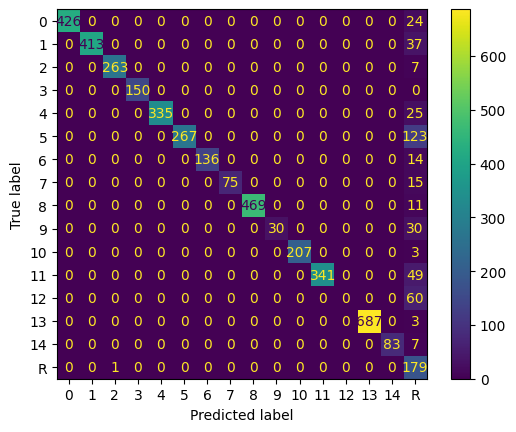

In [ ]:
cm = confusion_matrix(y_combined, y_pred_modified, labels=newest_label)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=newest_label)
cm_disp.plot()
plt.show()

In [ ]:
str_label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', 'R']
print(classification_report(y_combined, y_pred_modified, target_names=None, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.947     0.973       450
           1      1.000     0.918     0.957       450
          10      1.000     0.986     0.993       210
          11      1.000     0.874     0.933       390
          12      0.000     0.000     0.000        60
          13      1.000     0.996     0.998       690
          14      1.000     0.922     0.960        90
           2      0.996     0.974     0.985       270
           3      1.000     1.000     1.000       150
           4      1.000     0.931     0.964       360
           5      1.000     0.685     0.813       390
           6      1.000     0.907     0.951       150
           7      1.000     0.833     0.909        90
           8      1.000     0.977     0.988       480
           9      1.000     0.500     0.667        60
           R      0.305     0.994     0.467       180

    accuracy                          0.909      4470
   macro avg      0.894   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Scale 10

In [ ]:
y_pred_real, y_pred_modified, thresholds = predict_rejection(test_prediction, 10., mu_stds)

In [ ]:
print(thresholds)

[0.999976222880944, 0.9999977376719638, 0.9999975345733182, 0.9999994797280067, 0.9999972648197629, 0.9999693505656367, 0.9999994084634263, 0.9999934104585839, 0.9992642640002194, 0.9999469322666512, 0.9999998974009793, 0.9999950840987547, 1.0, 0.999917144223653, 0.999487780608977]


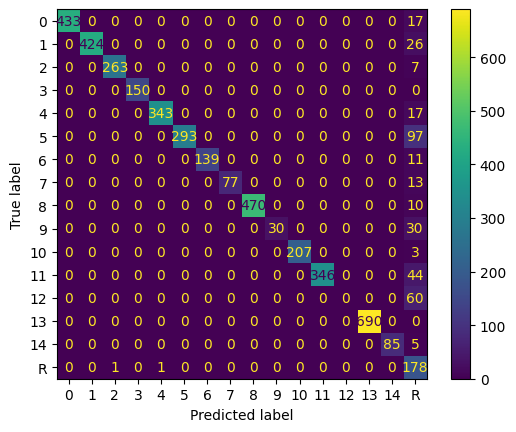

In [ ]:
cm = confusion_matrix(y_combined, y_pred_modified, labels=newest_label)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=newest_label)
cm_disp.plot()
plt.show()

In [ ]:
str_label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', 'R']
print(classification_report(y_combined, y_pred_modified, target_names=None, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.962     0.981       450
           1      1.000     0.942     0.970       450
          10      1.000     0.986     0.993       210
          11      1.000     0.887     0.940       390
          12      0.000     0.000     0.000        60
          13      1.000     1.000     1.000       690
          14      1.000     0.944     0.971        90
           2      0.996     0.974     0.985       270
           3      1.000     1.000     1.000       150
           4      0.997     0.953     0.974       360
           5      1.000     0.751     0.858       390
           6      1.000     0.927     0.962       150
           7      1.000     0.856     0.922        90
           8      1.000     0.979     0.989       480
           9      1.000     0.500     0.667        60
           R      0.344     0.989     0.510       180

    accuracy                          0.923      4470
   macro avg      0.896   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Scale 15

In [ ]:
y_pred_real, y_pred_modified, thresholds = predict_rejection(test_prediction, 15, mu_stds)

In [ ]:
print(thresholds)

[0.999964334321416, 0.9999966065079456, 0.9999963018599772, 0.9999992195920101, 0.9999958972296444, 0.9999540258484552, 0.9999991126951393, 0.9999901156878759, 0.998896396000329, 0.9999203983999768, 0.999999846101469, 0.999992626148132, 1.0, 0.9998757163354794, 0.9992316709134654]


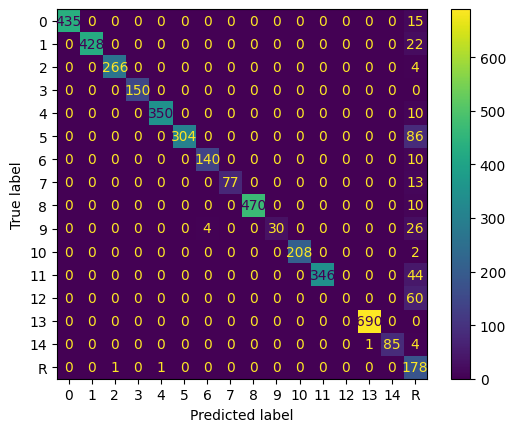

In [ ]:
cm = confusion_matrix(y_combined, y_pred_modified, labels=newest_label)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=newest_label)
cm_disp.plot()
plt.show()

In [ ]:
str_label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', 'R']
print(classification_report(y_combined, y_pred_modified, target_names=None, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.967     0.983       450
           1      1.000     0.951     0.975       450
          10      1.000     0.990     0.995       210
          11      1.000     0.887     0.940       390
          12      0.000     0.000     0.000        60
          13      0.999     1.000     0.999       690
          14      1.000     0.944     0.971        90
           2      0.996     0.985     0.991       270
           3      1.000     1.000     1.000       150
           4      0.997     0.972     0.985       360
           5      1.000     0.779     0.876       390
           6      0.972     0.933     0.952       150
           7      1.000     0.856     0.922        90
           8      1.000     0.979     0.989       480
           9      1.000     0.500     0.667        60
           R      0.368     0.989     0.536       180

    accuracy                          0.930      4470
   macro avg      0.896   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Scale 20

In [ ]:
y_pred_real, y_pred_modified, thresholds = predict_rejection(test_prediction, 20., mu_stds)

In [ ]:
print(thresholds)

[0.999952445761888, 0.9999954753439275, 0.9999950691466363, 0.9999989594560135, 0.9999945296395258, 0.9999387011312736, 0.9999988169268524, 0.9999868209171678, 0.9985285280004387, 0.9998938645333024, 0.9999997948019586, 0.9999901681975093, 1.0, 0.9998342884473058, 0.998975561217954]


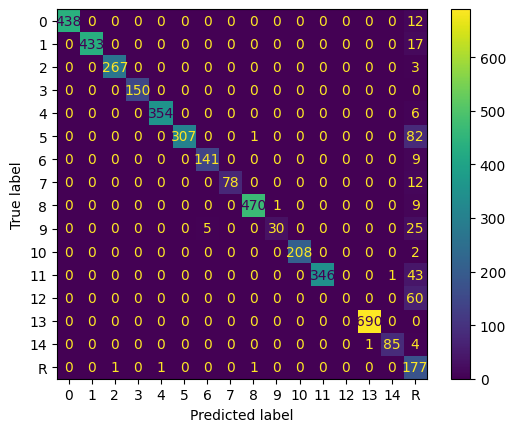

In [ ]:
cm = confusion_matrix(y_combined, y_pred_modified, labels=newest_label)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=newest_label)
cm_disp.plot()
plt.show()

In [ ]:
str_label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', 'R']
print(classification_report(y_combined, y_pred_modified, target_names=None, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.973     0.986       450
           1      1.000     0.962     0.981       450
          10      1.000     0.990     0.995       210
          11      1.000     0.887     0.940       390
          12      0.000     0.000     0.000        60
          13      0.999     1.000     0.999       690
          14      0.988     0.944     0.966        90
           2      0.996     0.989     0.993       270
           3      1.000     1.000     1.000       150
           4      0.997     0.983     0.990       360
           5      1.000     0.787     0.881       390
           6      0.966     0.940     0.953       150
           7      1.000     0.867     0.929        90
           8      0.996     0.979     0.987       480
           9      0.968     0.500     0.659        60
           R      0.384     0.983     0.552       180

    accuracy                          0.934      4470
   macro avg      0.893   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 128x128

In [ ]:
test_data = np.load('/content/drive/MyDrive/Cekripci/Data/Test/Seen/seen_test_128x128.npy')
unseen_data = np.load('/content/drive/MyDrive/Cekripci/Data/Test/Unseen/banner_unseen_128x128.npy')
EfficientNetB1_00004_128 = tf.keras.models.load_model('/content/drive/My Drive/Cekripci/Saved Model/EfficientNetB1_00004_128.h5')

In [ ]:
print(unseen_data.shape, unseen_label.shape)
print(test_data.shape, test_label.shape)

(180, 128, 128, 3) (180,)
(4290, 128, 128, 3) (4290,)


In [ ]:
# Combine both seen and unseen dataset
X_combined = np.concatenate([test_data, unseen_data])
y_combined = np.concatenate([test_label, unseen_label])

In [ ]:
print(X_combined.shape, y_combined.shape)

(4470, 128, 128, 3) (4470,)


Predict

In [ ]:
seen_train_X_pred = EfficientNetB1_00004_128.predict(X_train)
print(seen_train_X_pred.shape)

333/333 [==============================] - 12s 29ms/step
(10640, 15)


In [ ]:
seen_train_X_pred

array([[0.10462031, 0.35284337, 0.9999981 , ..., 0.0655032 , 0.1838578 ,
        0.17560078],
       [0.51596755, 0.18269724, 0.05384988, ..., 0.21679342, 0.45397264,
        0.11349095],
       [0.1468632 , 0.25309473, 0.23785098, ..., 0.3548245 , 0.9999975 ,
        0.18902867],
       ...,
       [0.25022465, 0.35701528, 0.30685917, ..., 0.18333162, 0.9999397 ,
        0.5973593 ],
       [0.5750003 , 0.13404688, 0.19540384, ..., 0.23092806, 0.99999595,
        0.2622482 ],
       [0.27517503, 0.3162214 , 0.11128446, ..., 0.27592346, 0.9999943 ,
        0.10821414]], dtype=float32)

In [ ]:
print(y_train)
print(y_train.shape)

[ 2  9 13 ... 13 13 13]
(10640,)


In [ ]:
def fit(prob_pos_X):
    prob_pos = [p for p in prob_pos_X] + [2-p for p in prob_pos_X]
    pos_mu, pos_std = dist_model.fit(prob_pos)
    return pos_mu, pos_std

In [ ]:
mu_stds = []
for i in range(len(range(15))):
    ''' prediction here is the model predicting X_train '''
    pos_mu, pos_std = fit(seen_train_X_pred[y_train==i, i])
    mu_stds.append([pos_mu, pos_std])

In [ ]:
print(mu_stds)

[[1.0, 8.932175391303887e-06], [1.0, 2.5993930958309767e-05], [1.0, 7.784269828799937e-06], [1.0, 1.3805715134344953e-05], [1.0, 1.4336094314401312e-05], [1.0, 9.908962961979222e-06], [1.0, 3.5405545497359066e-05], [1.0, 2.0286365260566773e-05], [1.0, 4.905878683193589e-06], [1.0, 8.521935741610994e-06], [1.0, 5.300959883292247e-06], [1.0, 2.4142381663249955e-05], [1.0, 1.019686652847635e-06], [1.0, 1.550759494907592e-05], [1.0, 0.00012087078338853746]]


In [ ]:
test_prediction = EfficientNetB1_00004_128.predict(X_combined)

140/140 [==============================] - 4s 31ms/step


In [ ]:
def predict_rejection(prediction, scale, mu_stds):
  y_pred_real = []
  y_pred_mod = []
  thresholds = [0] * 15 # initialize array with size (3, )
  for p in prediction:
    max_class = np.argmax(p)
    y_pred_real.append(max_class)
    max_value = np.max(p) # maximum probability
    # print("Class {}: {}".format(max_class, max_value))
    threshold = max(0.5, 1 - scale * mu_stds[max_class][1])
    thresholds[max_class] = threshold
    if max_value > threshold:
      y_pred_mod.append(max_class)
    else:
      y_pred_mod.append("R")

  return y_pred_real, y_pred_mod, thresholds

In [ ]:
newest_label = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 'R']

#### Scale 1

In [ ]:
y_pred_real, y_pred_modified, thresholds = predict_rejection(test_prediction, 1., mu_stds)

In [ ]:
print(thresholds)

[0.9999910678246087, 0.9999740060690417, 0.9999922157301712, 0.9999861942848657, 0.9999856639056856, 0.9999900910370381, 0.9999645944545026, 0.9999797136347395, 0.9999950941213168, 0.9999914780642584, 0.9999946990401167, 0.9999758576183367, 0.9999989803133471, 0.9999844924050509, 0.9998791292166115]


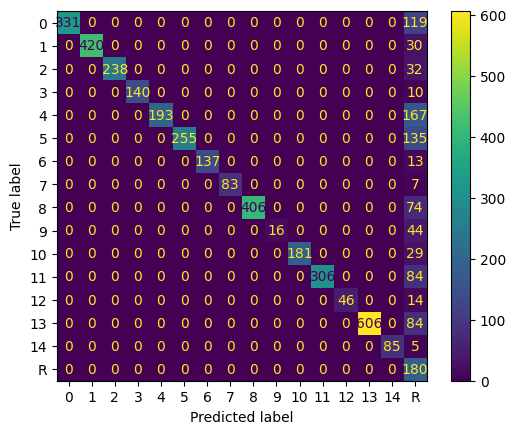

In [ ]:
cm = confusion_matrix(y_combined, y_pred_modified, labels=newest_label)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=newest_label)
cm_disp.plot()
plt.show()

In [ ]:
str_label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', 'R']
print(classification_report(y_combined, y_pred_modified, target_names=None, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.736     0.848       450
           1      1.000     0.933     0.966       450
          10      1.000     0.862     0.926       210
          11      1.000     0.785     0.879       390
          12      1.000     0.767     0.868        60
          13      1.000     0.878     0.935       690
          14      1.000     0.944     0.971        90
           2      1.000     0.881     0.937       270
           3      1.000     0.933     0.966       150
           4      1.000     0.536     0.698       360
           5      1.000     0.654     0.791       390
           6      1.000     0.913     0.955       150
           7      1.000     0.922     0.960        90
           8      1.000     0.846     0.916       480
           9      1.000     0.267     0.421        60
           R      0.175     1.000     0.298       180

    accuracy                          0.811      4470
   macro avg      0.948   

#### Scale 5

In [ ]:
y_pred_real, y_pred_modified, thresholds = predict_rejection(test_prediction, 5., mu_stds)

In [ ]:
print(thresholds)

[0.9999553391230435, 0.9998700303452085, 0.999961078650856, 0.9999309714243283, 0.999928319528428, 0.9999504551851901, 0.9998229722725132, 0.9998985681736972, 0.999975470606584, 0.9999573903212919, 0.9999734952005835, 0.9998792880916838, 0.9999949015667358, 0.9999224620252546, 0.9993956460830573]


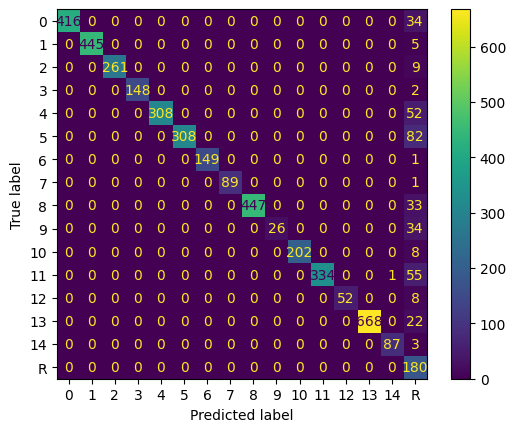

In [ ]:
cm = confusion_matrix(y_combined, y_pred_modified, labels=newest_label)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=newest_label)
cm_disp.plot()
plt.show()

In [ ]:
str_label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', 'R']
print(classification_report(y_combined, y_pred_modified, target_names=None, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.924     0.961       450
           1      1.000     0.989     0.994       450
          10      1.000     0.962     0.981       210
          11      1.000     0.856     0.923       390
          12      1.000     0.867     0.929        60
          13      1.000     0.968     0.984       690
          14      0.989     0.967     0.978        90
           2      1.000     0.967     0.983       270
           3      1.000     0.987     0.993       150
           4      1.000     0.856     0.922       360
           5      1.000     0.790     0.883       390
           6      1.000     0.993     0.997       150
           7      1.000     0.989     0.994        90
           8      1.000     0.931     0.964       480
           9      1.000     0.433     0.605        60
           R      0.340     1.000     0.508       180

    accuracy                          0.922      4470
   macro avg      0.958   

#### Scale 10

In [ ]:
y_pred_real, y_pred_modified, thresholds = predict_rejection(test_prediction, 10., mu_stds)

In [ ]:
print(thresholds)

[0.9999106782460869, 0.9997400606904169, 0.999922157301712, 0.9998619428486566, 0.999856639056856, 0.9999009103703802, 0.9996459445450264, 0.9997971363473943, 0.9999509412131681, 0.9999147806425839, 0.9999469904011671, 0.9997585761833675, 0.9999898031334715, 0.9998449240505093, 0.9987912921661146]


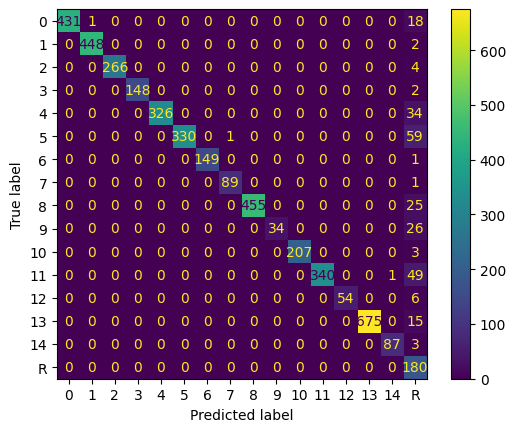

In [ ]:
cm = confusion_matrix(y_combined, y_pred_modified, labels=newest_label)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=newest_label)
cm_disp.plot()
plt.show()

In [ ]:
str_label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', 'R']
print(classification_report(y_combined, y_pred_modified, target_names=None, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.958     0.978       450
           1      0.998     0.996     0.997       450
          10      1.000     0.986     0.993       210
          11      1.000     0.872     0.932       390
          12      1.000     0.900     0.947        60
          13      1.000     0.978     0.989       690
          14      0.989     0.967     0.978        90
           2      1.000     0.985     0.993       270
           3      1.000     0.987     0.993       150
           4      1.000     0.906     0.950       360
           5      1.000     0.846     0.917       390
           6      1.000     0.993     0.997       150
           7      0.989     0.989     0.989        90
           8      1.000     0.948     0.973       480
           9      1.000     0.567     0.723        60
           R      0.421     1.000     0.592       180

    accuracy                          0.944      4470
   macro avg      0.962   

#### Scale 15

In [ ]:
y_pred_real, y_pred_modified, thresholds = predict_rejection(test_prediction, 15, mu_stds)

In [ ]:
print(thresholds)

[0.9998660173691304, 0.9996100910356254, 0.999883235952568, 0.9997929142729848, 0.9997849585852839, 0.9998513655555703, 0.9994689168175396, 0.9996957045210915, 0.9999264118197521, 0.9998721709638758, 0.9999204856017506, 0.9996378642750513, 0.9999847047002073, 0.9997673860757639, 0.9981869382491719]


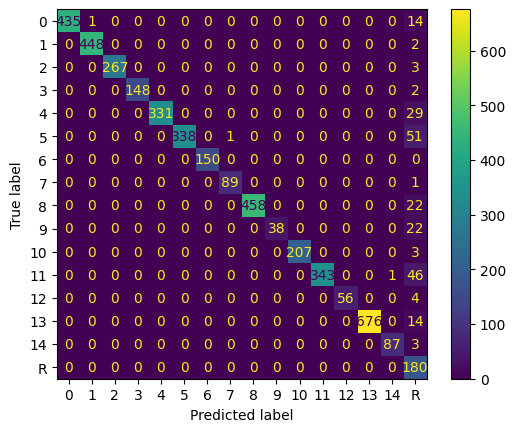

In [ ]:
cm = confusion_matrix(y_combined, y_pred_modified, labels=newest_label)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=newest_label)
cm_disp.plot()
plt.show()

In [ ]:
str_label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', 'R']
print(classification_report(y_combined, y_pred_modified, target_names=None, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.967     0.983       450
           1      0.998     0.996     0.997       450
          10      1.000     0.986     0.993       210
          11      1.000     0.879     0.936       390
          12      1.000     0.933     0.966        60
          13      1.000     0.980     0.990       690
          14      0.989     0.967     0.978        90
           2      1.000     0.989     0.994       270
           3      1.000     0.987     0.993       150
           4      1.000     0.919     0.958       360
           5      1.000     0.867     0.929       390
           6      1.000     1.000     1.000       150
           7      0.989     0.989     0.989        90
           8      1.000     0.954     0.977       480
           9      1.000     0.633     0.776        60
           R      0.455     1.000     0.625       180

    accuracy                          0.951      4470
   macro avg      0.964   

#### Scale 20

In [ ]:
y_pred_real, y_pred_modified, thresholds = predict_rejection(test_prediction, 20., mu_stds)

In [ ]:
print(thresholds)

[0.999821356492174, 0.9994801213808338, 0.999844314603424, 0.9997238856973131, 0.999713278113712, 0.9998018207407604, 0.9992918890900528, 0.9995942726947886, 0.9999018824263362, 0.9998295612851678, 0.9998939808023342, 0.999517152366735, 0.999979606266943, 0.9996898481010185, 0.9975825843322292]


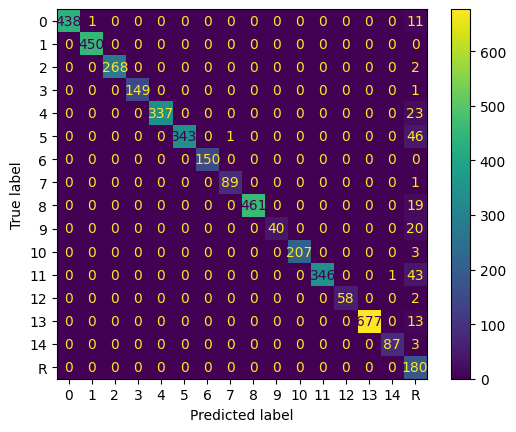

In [ ]:
cm = confusion_matrix(y_combined, y_pred_modified, labels=newest_label)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=newest_label)
cm_disp.plot()
plt.show()

In [ ]:
str_label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', 'R']
print(classification_report(y_combined, y_pred_modified, target_names=None, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.973     0.986       450
           1      0.998     1.000     0.999       450
          10      1.000     0.986     0.993       210
          11      1.000     0.887     0.940       390
          12      1.000     0.967     0.983        60
          13      1.000     0.981     0.990       690
          14      0.989     0.967     0.978        90
           2      1.000     0.993     0.996       270
           3      1.000     0.993     0.997       150
           4      1.000     0.936     0.967       360
           5      1.000     0.879     0.936       390
           6      1.000     1.000     1.000       150
           7      0.989     0.989     0.989        90
           8      1.000     0.960     0.980       480
           9      1.000     0.667     0.800        60
           R      0.490     1.000     0.658       180

    accuracy                          0.957      4470
   macro avg      0.967   

### 200x200

In [ ]:
test_data = np.load('/content/drive/MyDrive/Cekripci/Data/Test/Seen/seen_test_200x200.npy')
unseen_data = np.load('/content/drive/MyDrive/Cekripci/Data/Test/Unseen/banner_unseen_200x200.npy')
EfficientNetB1_00007_200 = tf.keras.models.load_model('/content/drive/My Drive/Cekripci/Saved Model/EfficientNetB1_00007_200.h5')

In [ ]:
print(unseen_data.shape, unseen_label.shape)
print(test_data.shape, test_label.shape)

(180, 200, 200, 3) (180,)
(4290, 200, 200, 3) (4290,)


In [ ]:
# Combine both seen and unseen dataset
X_combined = np.concatenate([test_data, unseen_data])
y_combined = np.concatenate([test_label, unseen_label])

In [ ]:
print(X_combined.shape, y_combined.shape)

(4470, 200, 200, 3) (4470,)


Predict

In [ ]:
seen_train_X_pred = EfficientNetB1_00007_200.predict(X_train)
print(seen_train_X_pred.shape)

333/333 [==============================] - 23s 63ms/step
(10640, 15)


In [ ]:
seen_train_X_pred

array([[0.05978954, 0.273889  , 0.99998736, ..., 0.08599912, 0.02112042,
        0.5357674 ],
       [0.2469291 , 0.07638291, 0.25961584, ..., 0.14892192, 0.08110653,
        0.11180604],
       [0.12543237, 0.16302957, 0.16127743, ..., 0.04754471, 0.99999964,
        0.24649085],
       ...,
       [0.2781433 , 0.51866275, 0.15699284, ..., 0.02708502, 0.9999982 ,
        0.08279428],
       [0.3212773 , 0.09409599, 0.157734  , ..., 0.00951851, 0.9999999 ,
        0.09684499],
       [0.21571666, 0.395322  , 0.25303638, ..., 0.0621905 , 0.99999833,
        0.03942719]], dtype=float32)

In [ ]:
print(y_train)
print(y_train.shape)

[ 2  9 13 ... 13 13 13]
(10640,)


In [ ]:
def fit(prob_pos_X):
    prob_pos = [p for p in prob_pos_X] + [2-p for p in prob_pos_X]
    pos_mu, pos_std = dist_model.fit(prob_pos)
    return pos_mu, pos_std

In [ ]:
mu_stds = []
for i in range(len(range(15))):
    ''' prediction here is the model predicting X_train '''
    pos_mu, pos_std = fit(seen_train_X_pred[y_train==i, i])
    mu_stds.append([pos_mu, pos_std])

In [ ]:
print(mu_stds)

[[1.0, 0.000239163168097354], [1.0, 5.405661408509116e-05], [1.0, 0.00015142109784287562], [1.0, 1.1217298340338207e-05], [1.0, 4.537924549234925e-06], [1.0, 8.57766116151263e-06], [1.0, 3.480747091544244e-05], [1.0, 4.441549704265e-06], [1.0, 1.7059370502938558e-05], [1.0, 8.118469218603292e-05], [1.0, 1.895425343550895e-05], [1.0, 4.223960531954079e-06], [1.0, 8.076793312723255e-07], [1.0, 6.953513238225303e-06], [1.0, 1.726465281316898e-05]]


In [ ]:
test_prediction = EfficientNetB1_00007_200.predict(X_combined)

140/140 [==============================] - 9s 67ms/step


In [ ]:
def predict_rejection(prediction, scale, mu_stds):
  y_pred_real = []
  y_pred_mod = []
  thresholds = [0] * 15 # initialize array with size (3, )
  for p in prediction:
    max_class = np.argmax(p)
    y_pred_real.append(max_class)
    max_value = np.max(p) # maximum probability
    # print("Class {}: {}".format(max_class, max_value))
    threshold = max(0.5, 1 - scale * mu_stds[max_class][1])
    thresholds[max_class] = threshold
    if max_value > threshold:
      y_pred_mod.append(max_class)
    else:
      y_pred_mod.append("R")

  return y_pred_real, y_pred_mod, thresholds

In [ ]:
newest_label = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 'R']

#### Scale 1

In [ ]:
y_pred_real, y_pred_modified, thresholds = predict_rejection(test_prediction, 1., mu_stds)

In [ ]:
print(thresholds)

[0.9997608368319026, 0.9999459433859149, 0.9998485789021572, 0.9999887827016597, 0.9999954620754508, 0.9999914223388385, 0.9999651925290846, 0.9999955584502958, 0.9999829406294971, 0.999918815307814, 0.9999810457465645, 0.9999957760394681, 0.9999991923206687, 0.9999930464867618, 0.9999827353471868]


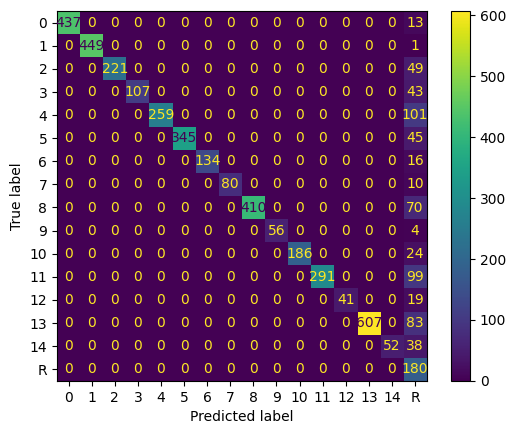

In [ ]:
cm = confusion_matrix(y_combined, y_pred_modified, labels=newest_label)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=newest_label)
cm_disp.plot()
plt.show()

In [ ]:
str_label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', 'R']
print(classification_report(y_combined, y_pred_modified, target_names=None, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.971     0.985       450
           1      1.000     0.998     0.999       450
          10      1.000     0.886     0.939       210
          11      1.000     0.746     0.855       390
          12      1.000     0.683     0.812        60
          13      1.000     0.880     0.936       690
          14      1.000     0.578     0.732        90
           2      1.000     0.819     0.900       270
           3      1.000     0.713     0.833       150
           4      1.000     0.719     0.837       360
           5      1.000     0.885     0.939       390
           6      1.000     0.893     0.944       150
           7      1.000     0.889     0.941        90
           8      1.000     0.854     0.921       480
           9      1.000     0.933     0.966        60
           R      0.226     1.000     0.369       180

    accuracy                          0.862      4470
   macro avg      0.952   

#### Scale 5

In [ ]:
y_pred_real, y_pred_modified, thresholds = predict_rejection(test_prediction, 5., mu_stds)

In [ ]:
print(thresholds)

[0.9988041841595132, 0.9997297169295746, 0.9992428945107856, 0.9999439135082983, 0.9999773103772538, 0.9999571116941924, 0.9998259626454228, 0.9999777922514786, 0.9999147031474853, 0.9995940765390698, 0.9999052287328225, 0.9999788801973403, 0.9999959616033436, 0.9999652324338089, 0.9999136767359341]


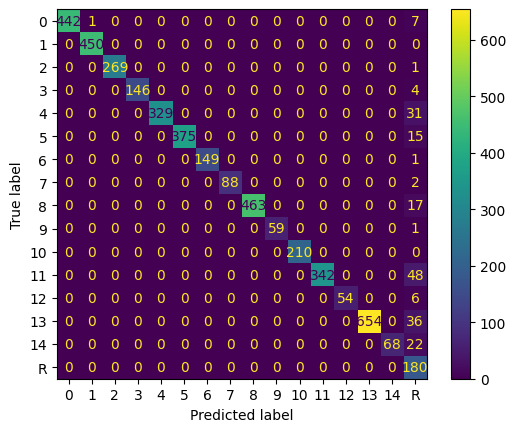

In [ ]:
cm = confusion_matrix(y_combined, y_pred_modified, labels=newest_label)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=newest_label)
cm_disp.plot()
plt.show()

In [ ]:
str_label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', 'R']
print(classification_report(y_combined, y_pred_modified, target_names=None, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.982     0.991       450
           1      0.998     1.000     0.999       450
          10      1.000     1.000     1.000       210
          11      1.000     0.877     0.934       390
          12      1.000     0.900     0.947        60
          13      1.000     0.948     0.973       690
          14      1.000     0.756     0.861        90
           2      1.000     0.996     0.998       270
           3      1.000     0.973     0.986       150
           4      1.000     0.914     0.955       360
           5      1.000     0.962     0.980       390
           6      1.000     0.993     0.997       150
           7      1.000     0.978     0.989        90
           8      1.000     0.965     0.982       480
           9      1.000     0.983     0.992        60
           R      0.485     1.000     0.653       180

    accuracy                          0.957      4470
   macro avg      0.968   

#### Scale 10

In [ ]:
y_pred_real, y_pred_modified, thresholds = predict_rejection(test_prediction, 10., mu_stds)

In [ ]:
print(thresholds)

[0.9976083683190264, 0.999459433859149, 0.9984857890215713, 0.9998878270165966, 0.9999546207545077, 0.9999142233883849, 0.9996519252908456, 0.9999555845029573, 0.9998294062949706, 0.9991881530781397, 0.9998104574656449, 0.9999577603946804, 0.9999919232066873, 0.9999304648676177, 0.9998273534718684]


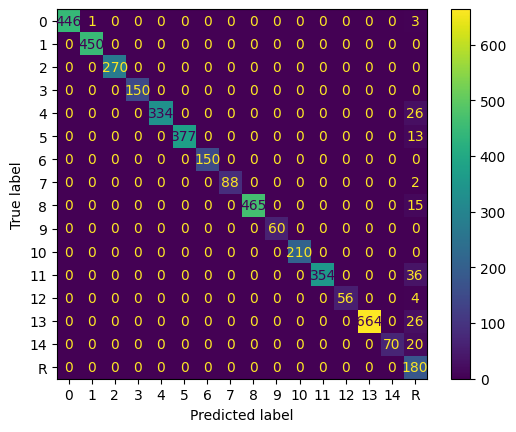

In [ ]:
cm = confusion_matrix(y_combined, y_pred_modified, labels=newest_label)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=newest_label)
cm_disp.plot()
plt.show()

In [ ]:
str_label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', 'R']
print(classification_report(y_combined, y_pred_modified, target_names=None, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.991     0.996       450
           1      0.998     1.000     0.999       450
          10      1.000     1.000     1.000       210
          11      1.000     0.908     0.952       390
          12      1.000     0.933     0.966        60
          13      1.000     0.962     0.981       690
          14      1.000     0.778     0.875        90
           2      1.000     1.000     1.000       270
           3      1.000     1.000     1.000       150
           4      1.000     0.928     0.963       360
           5      1.000     0.967     0.983       390
           6      1.000     1.000     1.000       150
           7      1.000     0.978     0.989        90
           8      1.000     0.969     0.984       480
           9      1.000     1.000     1.000        60
           R      0.554     1.000     0.713       180

    accuracy                          0.967      4470
   macro avg      0.972   

#### Scale 15

In [ ]:
y_pred_real, y_pred_modified, thresholds = predict_rejection(test_prediction, 15, mu_stds)

In [ ]:
print(thresholds)

[0.9964125524785397, 0.9991891507887236, 0.9977286835323569, 0.9998317405248949, 0.9999319311317615, 0.9998713350825773, 0.9994778879362683, 0.999933376754436, 0.999744109442456, 0.9987822296172095, 0.9997156861984674, 0.9999366405920207, 0.9999878848100309, 0.9998956973014266, 0.9997410302078025]


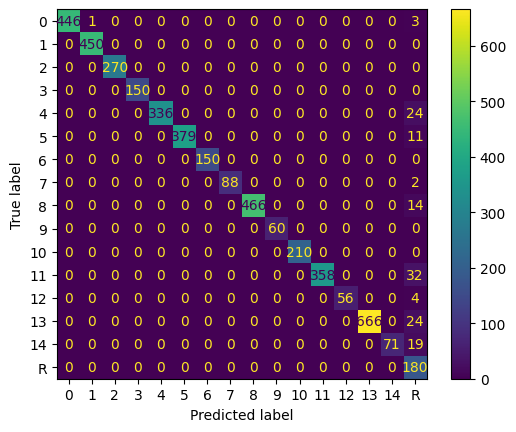

In [ ]:
cm = confusion_matrix(y_combined, y_pred_modified, labels=newest_label)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=newest_label)
cm_disp.plot()
plt.show()

In [ ]:
str_label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', 'R']
print(classification_report(y_combined, y_pred_modified, target_names=None, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.991     0.996       450
           1      0.998     1.000     0.999       450
          10      1.000     1.000     1.000       210
          11      1.000     0.918     0.957       390
          12      1.000     0.933     0.966        60
          13      1.000     0.965     0.982       690
          14      1.000     0.789     0.882        90
           2      1.000     1.000     1.000       270
           3      1.000     1.000     1.000       150
           4      1.000     0.933     0.966       360
           5      1.000     0.972     0.986       390
           6      1.000     1.000     1.000       150
           7      1.000     0.978     0.989        90
           8      1.000     0.971     0.985       480
           9      1.000     1.000     1.000        60
           R      0.575     1.000     0.730       180

    accuracy                          0.970      4470
   macro avg      0.973   

#### Scale 20

In [ ]:
y_pred_real, y_pred_modified, thresholds = predict_rejection(test_prediction, 20., mu_stds)

In [ ]:
print(thresholds)

[0.9952167366380529, 0.9989188677182982, 0.9969715780431425, 0.9997756540331932, 0.9999092415090153, 0.9998284467767697, 0.9993038505816911, 0.9999111690059147, 0.9996588125899413, 0.9983763061562794, 0.9996209149312898, 0.999915520789361, 0.9999838464133746, 0.9998609297352355, 0.9996547069437366]


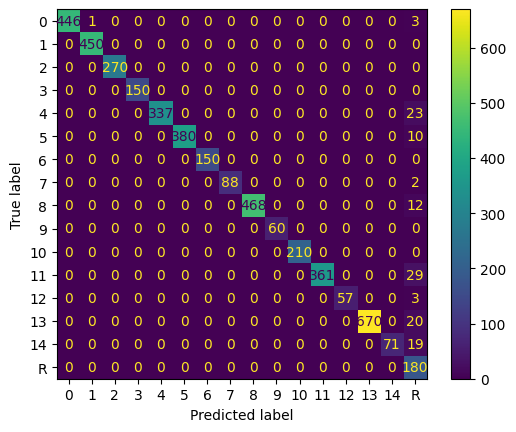

In [ ]:
cm = confusion_matrix(y_combined, y_pred_modified, labels=newest_label)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=newest_label)
cm_disp.plot()
plt.show()

In [ ]:
str_label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', 'R']
print(classification_report(y_combined, y_pred_modified, target_names=None, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.991     0.996       450
           1      0.998     1.000     0.999       450
          10      1.000     1.000     1.000       210
          11      1.000     0.926     0.961       390
          12      1.000     0.950     0.974        60
          13      1.000     0.971     0.985       690
          14      1.000     0.789     0.882        90
           2      1.000     1.000     1.000       270
           3      1.000     1.000     1.000       150
           4      1.000     0.936     0.967       360
           5      1.000     0.974     0.987       390
           6      1.000     1.000     1.000       150
           7      1.000     0.978     0.989        90
           8      1.000     0.975     0.987       480
           9      1.000     1.000     1.000        60
           R      0.598     1.000     0.748       180

    accuracy                          0.973      4470
   macro avg      0.975   